# Previsão de Cancelamento de Reservas de Hotel

## Índice
1. [Introdução](#1-introdução)

2. [Exploração e Preparação dos Dados](#2-exploração-e-preparação-dos-dados)
   - [Análise descritiva](#2.1-análise-descritiva)
   - [Variável Target](#2.2-variável-target)
   - [Atributos Numéricos](#2.3-atributos-numéricos)
   - [Atributos Categóricos](#2.4-atributos-categóricos)
   - [Agregação de colunas](#2.5-agregação-de-colunas)
   - [Duplicados](#2.6-duplicados)
   - [Valores em Falta e respetivo preenchimento](#2.7-valores-em-falta-e-respetivo-preenchimento)
   - [Matriz de correlação](#2.8-matriz-de-correlação)

3. [Pré-processamento dos Dados](#3-pré-processamento-dos-dados)
   - [Normalização](#3.1-normalização)
   - [Divisão dos dados, Escalonamento e PCA](#3.2-divisão-dos-dados-escalonamento-e-pca)
   - [Identificação e Remoção de outliers](#3.3-identificação-e-remocao-de-outliers)

4. [Feature Selection](#4-feature-selection)
   - [Filter Methods](#4.1-filter-methods)
     - [ANOVA](#4.1.1-anova)
     - [CHI-SQUARED](#4.1.2-chi-squared)
   - [Embedded Methods](#4.2-embedded-methods)
     - [LASSO Regularization](#4.2.1-lasso-regularization)
     - [Random Forest Algorithm](#4.2.2-random-forest-algorithm)

5. [Criação e Comparação entre modelos](#5-criação-e-comparação-entre-modelos)
   - [Neural Networks](#5.1-neural-networks)

6. [Combinação de modelos](#6-combinação-de-modelos)

7. [Conclusão](#7-conclusão)
   - [Sumário dos principais resultados](#sumário-dos-principais-resultados)


## 1. Introdução
O objetivo deste projeto é desenvolver modelos preditivos para identificar a probabilidade de cancelamento de reservas de hotel. Utilizando um conjunto de dados extenso que inclui diversas características dos clientes, como tempo de antecedência da reserva, tipo de cliente e segmento de mercado, pretendemos explorar, pré-processar e aplicar algoritmos de mineração de dados para construir modelos preditivos robustos. A análise segue a metodologia CRISP-DM, abrangendo as fases de exploração e preparação dos dados.

Carregaram-se as bibliotecas necessárias e preparou-se o ambiente para a análise.

In [38]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.layers import Dense, GRU, LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")
from itertools import product
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import RMSprop
from sklearn.preprocessing import MinMaxScaler




# 2. Exploração e Preparação dos Dados

Carregou-se o conjunto de dados num DataFrame para análise.

In [40]:
# Load the dataset
data_path = 'Metro_Interstate_Traffic_Volume_reduced.csv' 
df = pd.read_csv(data_path)

df

,date_time,holiday,weather_main,weather_description,rain_1h,snow_1h,clouds_all,temp,traffic_volume
0,2016-07-01 00:00:00,NaN,Clear,sky is clear,0.0,0.0,1,289.04,825
1,2016-07-01 01:00:00,NaN,Clear,sky is clear,0.0,0.0,1,288.16,531
2,2016-07-01 02:00:00,NaN,Clear,sky is clear,0.0,0.0,1,286.64,381
3,2016-07-01 03:00:00,NaN,Clear,sky is clear,0.0,0.0,1,285.39,406
4,2016-07-01 04:00:00,NaN,Clear,sky is clear,0.0,0.0,1,284.67,790
...,...,...,...,...,...,...,...,...,...
23617,2018-09-30 19:00:00,NaN,Clouds,broken clouds,0.0,0.0,75,283.45,3543
23618,2018-09-30 20:00:00,NaN,Clouds,overcast clouds,0.0,0.0,90,282.76,2781
23619,2018-09-30 21:00:00,NaN,Thunderstorm,proximity thunderstorm,0.0,0.0,90,282.73,2159
23620,2018-09-30 22:00:00,NaN,Clouds,overcast clouds,0.0,0.0,90,282.09,1450


Verificaram-se os tipos de dados das colunas.

In [205]:

# Check data types
df.dtypes


date_time               object
holiday                 object
weather_main            object
weather_description     object
rain_1h                float64
snow_1h                float64
clouds_all               int64
temp                   float64
traffic_volume           int64
dtype: object

<div class="alert alert-block alert-info">
Concluiu-se que existe uma variedade de dados no conjunto. Existem variáveis categóricas, como hotel, meal, country, market_segment, deposit_type, customer_type e reservation_status, que representam informações descritivas sobre as reservas e os clientes. Há também variáveis numéricas inteiras, como is_canceled, lead_time, arrival_date_year, stays_in_weekend_nights, adults, previous_cancellations e booking_changes. Variáveis numéricas com casas decimais, como children, adr, agent e company, representam dados contínuos com precisão decimal. Além disso, existem variáveis de data, como reservation_status_date.
</div>

## 2.1 Análise descritiva 

In [208]:
df.info

<bound method DataFrame.info of                  date_time holiday  weather_main     weather_description  \
0      2016-07-01 00:00:00     NaN         Clear            sky is clear   
1      2016-07-01 01:00:00     NaN         Clear            sky is clear   
2      2016-07-01 02:00:00     NaN         Clear            sky is clear   
3      2016-07-01 03:00:00     NaN         Clear            sky is clear   
4      2016-07-01 04:00:00     NaN         Clear            sky is clear   
...                    ...     ...           ...                     ...   
23617  2018-09-30 19:00:00     NaN        Clouds           broken clouds   
23618  2018-09-30 20:00:00     NaN        Clouds         overcast clouds   
23619  2018-09-30 21:00:00     NaN  Thunderstorm  proximity thunderstorm   
23620  2018-09-30 22:00:00     NaN        Clouds         overcast clouds   
23621  2018-09-30 23:00:00     NaN        Clouds         overcast clouds   

       rain_1h  snow_1h  clouds_all    temp  traffic_vo

In [209]:

# Descriptive statistics for numerical columns
df.describe()


,rain_1h,snow_1h,clouds_all,temp,traffic_volume
count,23622.000000,23622.0,23622.000000,23622.000000,23622.000000
mean,0.494697,0.0,47.238252,282.525740,3245.343282
std,63.969632,0.0,39.583571,12.400988,1959.766880
min,0.000000,0.0,0.000000,243.390000,0.000000
25%,0.000000,0.0,1.000000,273.420000,1211.000000
50%,0.000000,0.0,40.000000,284.755000,3400.000000
75%,0.000000,0.0,90.000000,292.650000,4878.000000
max,9831.300000,0.0,100.000000,310.070000,7280.000000


 Executou-se uma operação de processamento de dados ou análise.

<div class="alert alert-block alert-info">

A análise descritiva das variáveis numéricas do dataset forneceu informações sobre a distribuição e as características dos dados como:

Contagem (count): A maioria das variáveis tem 119.390 observações, mas agent e company têm contagens mais baixas, indicando dados em falta para essas colunas.

Média (mean): A média de is_canceled é 0.37, sugerindo que cerca de 37% das reservas foram canceladas. A variável lead_time tem uma média de 104 dias, indicando que, em média, as reservas são feitas com bastante antecedência.

Desvio padrão (std): Algumas variáveis, como lead_time (106.86) e adr (50.54), têm desvios padrão altos, indicando variação significativa nos valores.

Valores mínimos (min) e máximos (max): Os valores extremos, como adr com um mínimo de -6.38 e um máximo de 5400, podem indicar a presença de outliers.
Outras variáveis, como adults e children, têm valores máximos elevados que podem sugerir reservas incomuns.

Quartis (25%, 50%, 75%): Os quartis mostram a distribuição dos dados. Por exemplo, 50% das reservas têm lead_time de até 69 dias, e 75% das reservas têm até 3 noites em stays_in_week_nights.

</div>

## 2.2 Variável Target

Contaram-se os valores da variável alvo para entender a distribuição.

In [214]:
goal = df['traffic_volume']
counts = goal.value_counts()
percent = goal.value_counts(normalize=True)
percent100 = goal.value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
pd.DataFrame({'Quantidade': counts, 'Percentagem': percent100})

,Quantidade,Percentagem
traffic_volume,,
353,29,0.1%
358,26,0.1%
373,24,0.1%
344,24,0.1%
352,23,0.1%
...,...,...
2955,1,0.0%
3874,1,0.0%
1562,1,0.0%


Concluiu-se que a variável is_canceled apresenta um desbalanceamento, com 63% das reservas não canceladas (valor 0) e 37% canceladas (valor 1).

Plotaram-se gráficos para visualização dos dados.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_16608\3924323337.py:1: UserWarning: 
The palette list has fewer values (2) than needed (6028) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(x="traffic_volume", hue="traffic_volume", kind="count", data=df, palette=['#c084fc', '#7b2cbf'], legend=False)


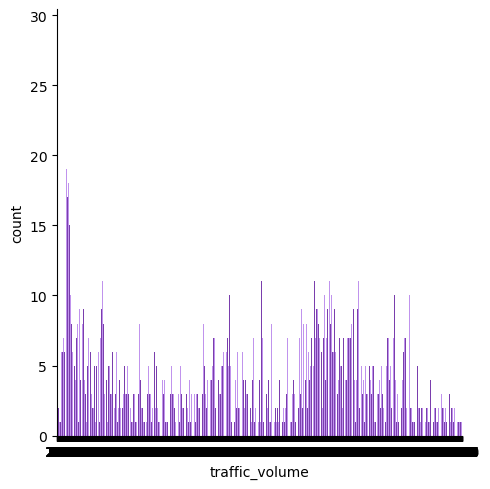

In [217]:
sns.catplot(x="traffic_volume", hue="traffic_volume", kind="count", data=df, palette=['#c084fc', '#7b2cbf'], legend=False)
plt.show()

<div class="alert alert-block alert-info">
O gráfico mostra que a maioria das reservas (cerca de 63%) não foi cancelada, enquanto 37% foram canceladas, evidenciando um desbalanceamento nas classes.
</div>

## 2.3 Atributos Numéricos

O *dataset* (df) apresenta o seguinte conjunto de atributos numéricos:

+ *lead_time*
+ *arrival_date_year*
+ *arrival_date_week_number*
+ *arrival_date_day_of_month*
+ *stays_in_weekend_nights*
+ *stays_in_week_nights*
+ *adults*
+ *children*
+ *babies*
+ *is_repeated_guest*
+ *previous_cancellations*
+ *previous_bookings_not_canceled*
+ *booking_changes*
+ *agent*
+ *company*
+ *days_in_waiting_list*
+ *adr*
+ *required_car_parking_spaces*
+ *total_of_special_requests*



Verificaram-se os tipos de dados das colunas.

In [222]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).drop('traffic_volume', axis=1).columns

print("Existem", len(numerical_cols),"atributos numéricos:" , list(numerical_cols))


Existem 4 atributos numéricos: ['rain_1h', 'snow_1h', 'clouds_all', 'temp']


Plotaram-se gráficos para visualização dos dados.

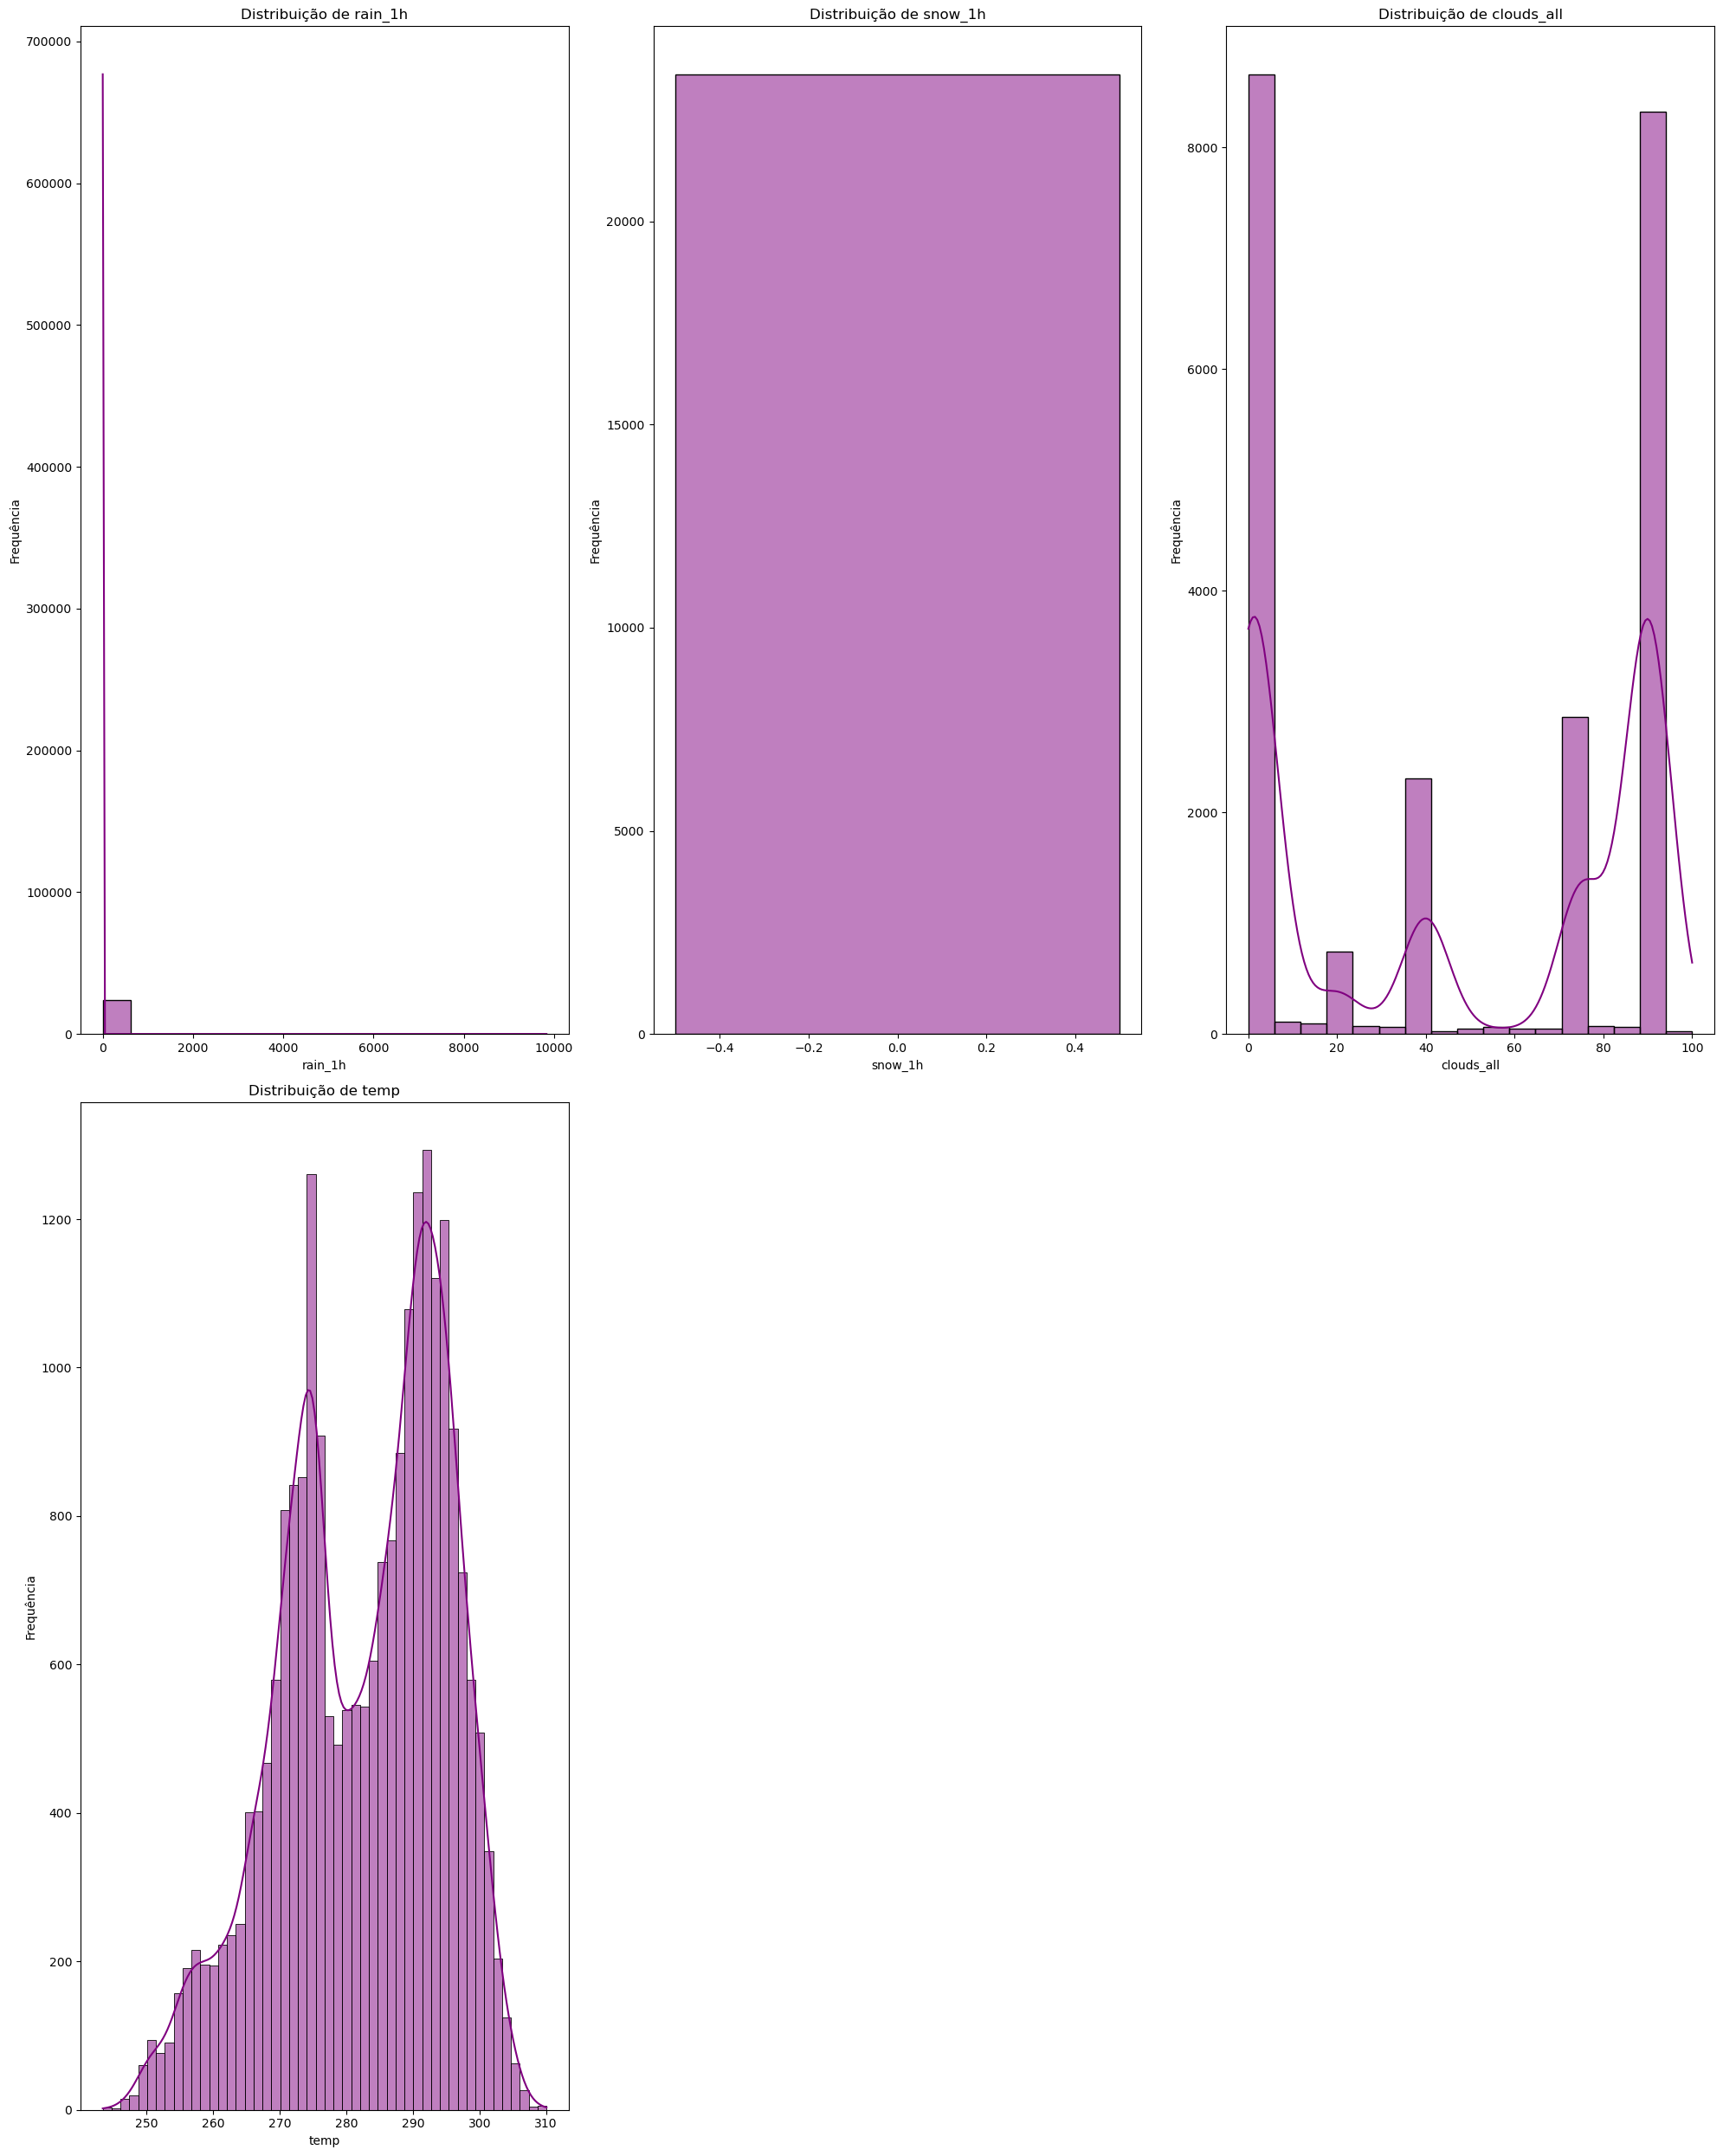

In [224]:
plt.figure(figsize=(20, 25))
for i, col in enumerate(numerical_cols):
    plt.subplot((len(numerical_cols) + 2) // 3, 3, i + 1)
    sns.histplot(data=df, x=col, kde=True, color='purple')
    plt.title(f'Distribuição de {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">

Através dos gráficos é possível concluir que:

Lead Time: A distribuição é assimétrica à direita, indicando que a maioria das reservas é feita com um tempo de antecedência menor, mas existem casos de reservas com um lead_time muito maior.

Arrival Date Year: Observa-se uma maior concentração de reservas nos anos de 2016 e 2017, o que pode indicar que estes são os anos principais do dataset.

Arrival Date Week Number: A distribuição é relativamente uniforme ao longo das semanas do ano, sem picos significativos, indicando que as reservas estão bem distribuídas entre as semanas.

Stays in Weekend Nights e Stays in Week Nights: A maioria das reservas inclui poucas noites de fim de semana e durante a semana, sugerindo que as estadias curtas são mais comuns.

Adults, Children e Babies: A distribuição de adults mostra que a maioria das reservas é para 1 ou 2 adultos, enquanto o número de crianças e bebés é geralmente baixo, com poucos casos de famílias maiores.

Previous Cancellations e Previous Bookings Not Canceled: A maioria dos clientes não teve cancelamentos ou reservas anteriores não canceladas, indicando que muitos podem ser novos clientes ou clientes sem um histórico de cancelamentos.

Is Repeated Guest: A maioria dos hóspedes não é um cliente recorrente, sugerindo que muitos hóspedes estão a fazer reservas pela primeira vez.

Agent e Company: A distribuição de agent e company mostra uma concentração em certos valores específicos, o que pode representar parceiros ou agentes de reserva mais comuns.

Booking Changes: A maioria das reservas não apresenta alterações, com uma pequena parte mostrando mudanças feitas nas reservas.

Agent: A distribuição mostra uma concentração em torno de alguns valores específicos, indicando que poucos agentes ou plataformas de reserva são responsáveis por grande parte das reservas.

Company: Existe uma distribuição mais diversificada, mas a maior parte dos registros está concentrada em valores baixos ou ausentes, indicando que muitas reservas não estão associadas a uma empresa específica.

Days in Waiting List: A maioria das reservas não tem dias em lista de espera (valor 0), com apenas algumas reservas passando por períodos de espera, o que é raro.

ADR (Average Daily Rate): A distribuição é assimétrica com uma cauda longa à direita, sugerindo que a maioria das tarifas diárias médias é baixa, mas existem outliers com valores significativamente altos.

Required Car Parking Spaces: A maioria das reservas não solicita estacionamento (valor 0), com poucas reservas requerendo um ou mais espaços, o que mostra que a demanda por estacionamento é baixa.

Total of Special Requests: A distribuição mostra que a maioria dos clientes faz poucos pedidos especiais (0 ou 1), com alguns fazendo mais de dois pedidos, mas em menor frequência.
</div>

## 2.4 Atributos Categóricos

O *dataset* (df) apresenta o seguinte conjunto de atributos categóricos:

+ *hotel*
+ *arrival_date_month*
+ *meal*
+ *country*
+ *market_segment*
+ *distribution_channel*
+ *reserved_room_type*
+ *assigned_room_type*
+ *deposit_type*
+ *customer_type*
+ *reservation_status*
+ *reservation_status_date*
+ *name*
+ *email*
+ *phone-number*
+ *credit_card*



Verificaram-se os tipos de dados das colunas.

In [229]:
categorical_cols = df.select_dtypes(include=['object']).columns
print("Existem", len(categorical_cols),"atributos categóricos:" , list(categorical_cols))

Existem 4 atributos categóricos: ['date_time', 'holiday', 'weather_main', 'weather_description']


Plotaram-se gráficos para visualização dos dados.

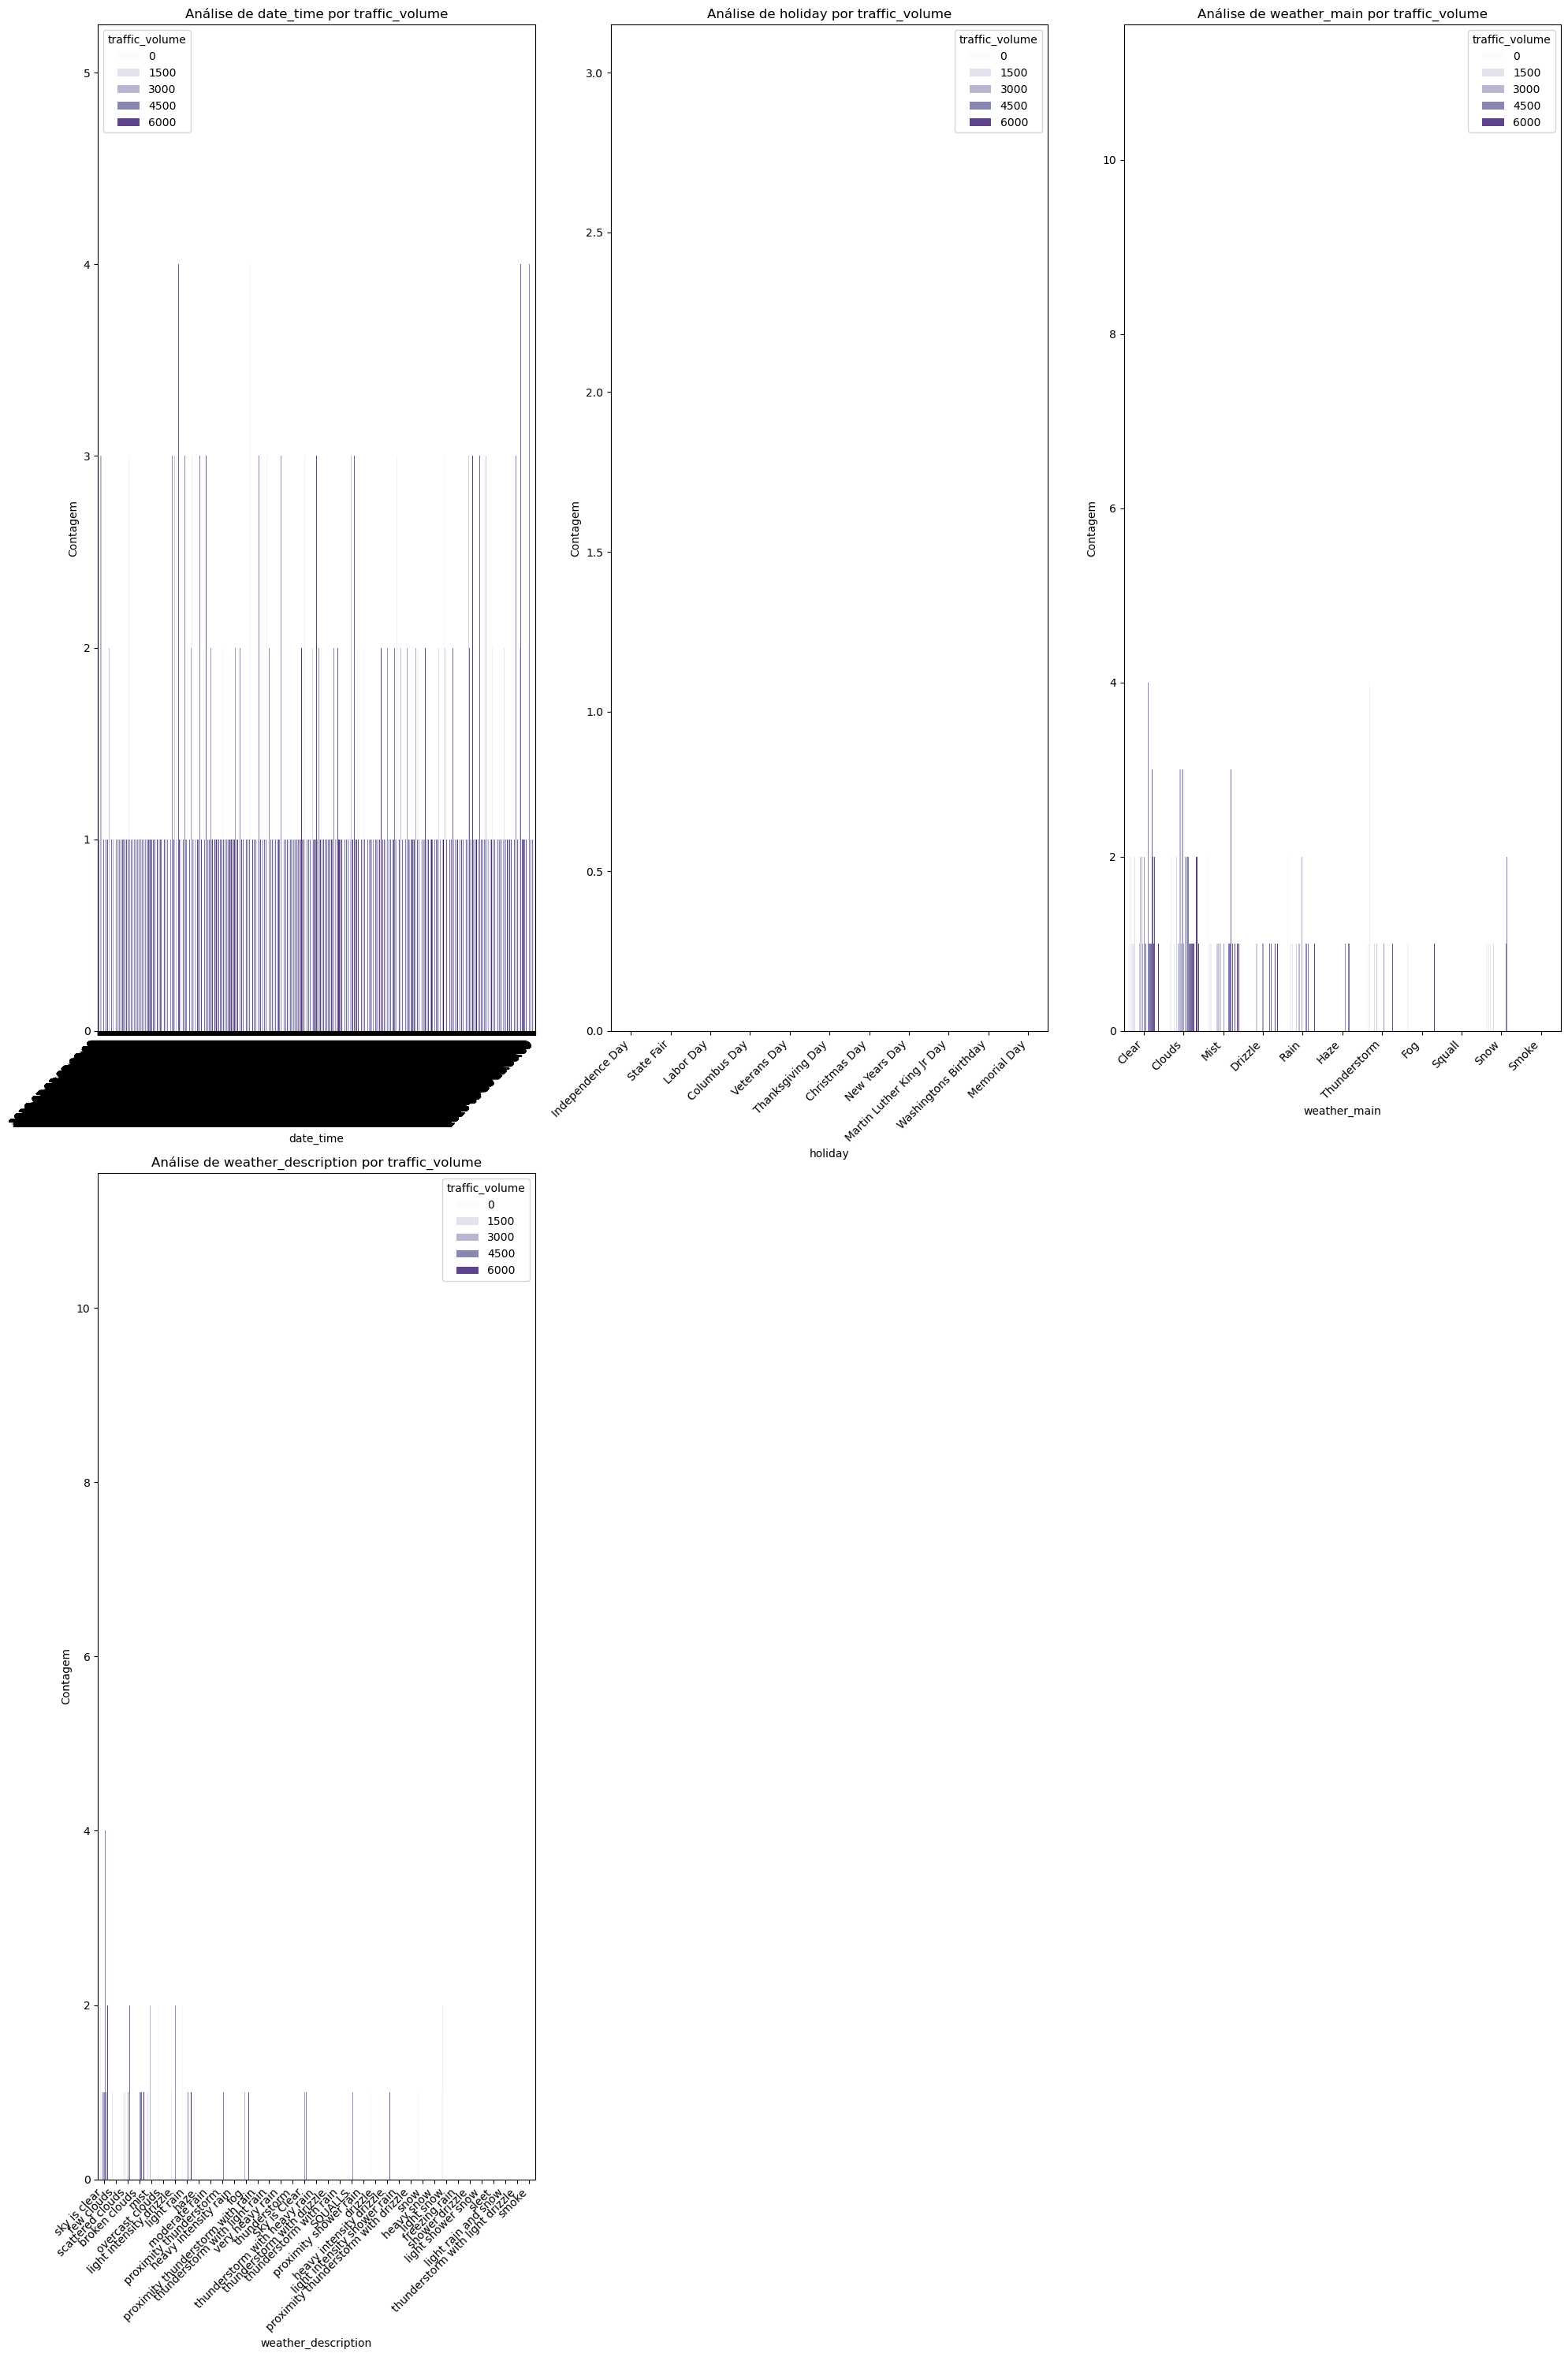

In [231]:
plt.figure(figsize=(20, 30))
 
for i, col in enumerate(categorical_cols, 1):
    plt.subplot((len(categorical_cols) + 2) // 3, 3, i)
    sns.countplot(data=df, x=col, hue='traffic_volume', palette='Purples')
    plt.title(f'Análise de {col} por traffic_volume')
    plt.xlabel(col)
    plt.xticks(rotation=45, ha='right')
    plt.ylabel('Contagem')
 
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">

Com base nos gráficos, é possível concluir o seguinte sobre a variável is_canceled em relação a outras variáveis categóricas:

Hotel: Os cancelamentos são mais comuns em hotéis do tipo "City Hotel" do que em "Resort Hotel", o que pode indicar que reservas em hotéis urbanos estão mais sujeitas a cancelamentos.

Arrival Date Month: A distribuição de cancelamentos varia ao longo dos meses. Meses como janeiro e agosto parecem ter uma proporção maior de cancelamentos em comparação a outros meses, indicando possíveis sazonalidades que afetam as taxas de cancelamento.

Meal: A maior parte das reservas canceladas está associada ao plano de refeição "BB" (Bed & Breakfast). Isto sugere que os hóspedes que optam por esse tipo de refeição podem ter maior tendência a cancelar.

Country: A distribuição de cancelamentos por país parece bastante dispersa, com a maioria dos países apresentando um número pequeno de cancelamentos. No entanto, alguns países específicos (provavelmente com maior número de reservas) mostram uma quantidade considerável de cancelamentos.

Market Segment: Cancelamentos são mais frequentes em segmentos como "Online TA" (Online Travel Agencies), seguido por "Groups". Estes segmentos podem ter características específicas que aumentam a probabilidade de cancelamento.

Distribution Channel: O canal de distribuição "TA/TO" (Travel Agent/Tour Operator) apresenta um número elevado de cancelamentos em comparação a outros canais, como "Direct" ou "Corporate". Isto pode indicar que reservas feitas através de intermediários são mais suscetíveis a cancelamento.

Reserved Room Type: A maior parte das reservas canceladas está associada ao tipo de quarto "A", que é também o tipo de quarto mais comum nas reservas. Os outros tipos de quarto apresentam menos cancelamentos em proporção.

Assigned Room Type: Assim como o tipo de quarto reservado, o tipo de quarto atribuído "A" tem uma quantidade considerável de cancelamentos, o que pode indicar uma correlação entre o tipo de quarto atribuído e a decisão de cancelamento.

Deposit Type: A maioria dos cancelamentos ocorre em reservas com "No Deposit" (sem depósito), enquanto reservas com "Non Refund" (não reembolsável) apresentam significativamente menos cancelamentos, o que é esperado devido à política mais restritiva.

Customer Type: Clientes do tipo "Transient" (hóspedes que fazem reservas individuais, geralmente para estadias curtas) têm uma proporção mais alta de cancelamentos, comparado a outros tipos como "Contract" e "Group".

Reservation Status: O status "Canceled" está diretamente relacionado a is_canceled e confirma a quantidade de reservas efetivamente canceladas. O status "Checked-Out" representa reservas que não foram canceladas e seguiram com o processo normal.

Reservation Status Date: A distribuição dos cancelamentos por data de status da reserva é bastante dispersa, com alguns picos ao longo do tempo, indicando que podem haver datas específicas com maior incidência de cancelamentos.

Name: A distribuição de cancelamentos por name é dispersa e não apresenta um padrão claro. Isto sugere que a variável name por si só não contribui significativamente para prever cancelamentos, uma vez que não há uma relação visível entre nomes específicos e a ocorrência de cancelamentos.

Email: A análise por email também mostra uma distribuição dispersa e pouco informativa. Tal como name, a variável email não parece fornecer uma indicação direta de cancelamento, pois os valores são diversos e a relação entre eles e os cancelamentos é difusa.

Phone-number: A variável phone-number apresenta uma distribuição que não revela um padrão perceptível entre números de telefone e cancelamentos. Isso indica que o número de telefone não é uma variável relevante para prever se uma reserva será cancelada.

Credit Card: A análise da variável credit_card mostra uma distribuição levemente mais segmentada, mas ainda assim não parece ter uma relação clara com os cancelamentos. A variabilidade pode indicar que, embora os cartões de crédito sejam um dado importante para a reserva, eles não são necessariamente indicadores diretos de cancelamento.
</div>

<div class="alert alert-block alert-info">
Agregou-se as colunas ['agent'] e ['company'], numa só coluna denominada ['agent_company'], uma vez que, as colunas agregadas transmitem a informação de quem realizou a reserva e essa informação numa só coluna, facilita a análise dos dados.

Criou-se a coluna ['arrival_date_combined'], que combina ['arrival_date_year'], ['arrival_date_month'] e ['arrival_date_day_of_month'] numa única coluna de data, representando a data completa de chegada.

Criou-se a coluna ['total_stays_nights'], que soma ['stays_in_weekend_nights'] e ['stays_in_week_nights'] para obter o total de noites de estadia.

Criou-se a coluna ['total_people'], que agrega ['adults'], ['children'] e ['babies'] para representar o total de pessoas na reserva.

As colunas que foram agrupadas foram removidas do DataFrame para evitar redundância e simplificar a análise.

</div>

## 2.6 Duplicados

Removeu-se as colunas duplicadas do conjunto de dados para garantir que os dados não contenham repetições que possam distorcer análises e os modelos, levando a resultados menos precisos.

In [42]:
print('Shape before deleting duplicate values:', df.shape)

df = df.drop_duplicates()

print('Shape after deleting duplicate values:', df.shape)

Shape before deleting duplicate values: (23622, 9)
Shape after deleting duplicate values: (23607, 9)


<div class="alert alert-block alert-info">
Conclui-se que antes de remover os valores duplicados, o dataset tinha um total de 119.390 registros com 26 colunas. Após a remoção dos duplicados, o conjunto de dados foi reduzido para 87.367 registros, mantendo o mesmo número de colunas.
</div>

## 2.7 Valores em Falta e respetivo preenchimento

<div class="alert alert-block alert-info">
Identificou-se os valores ausentes e com base no cálculos da sua percentagem, efetou-se o preenchimento desses valores na coluna ['country'] com a string "Desconhecido", de forma a indicar que a informação do país não está disponível e para o caso da coluna ['total_people'] preencheu-se com a mediana porque é uma medida que não é influenciada por outliers.
</div>

In [44]:

# Check for missing values
missing_values_summary = df.isnull().sum()

missing_values_summary


date_time                  0
holiday                23576
weather_main               0
weather_description        0
rain_1h                    0
snow_1h                    0
clouds_all                 0
temp                       0
traffic_volume             0
dtype: int64

In [46]:

# Check the percentage of missing values
missing_values_percent = (df.isnull().sum() / len(df)) * 100
missing_values_percent


date_time               0.000000
holiday                99.868683
weather_main            0.000000
weather_description     0.000000
rain_1h                 0.000000
snow_1h                 0.000000
clouds_all              0.000000
temp                    0.000000
traffic_volume          0.000000
dtype: float64

Preencheram-se valores ausentes para evitar perda de dados.

In [48]:
df = df.copy() 
df['date_time'] = pd.to_datetime(df['date_time'])

holiday_mask = df['holiday'].notnull()

for idx, row in df[holiday_mask].iterrows():
    start_of_day = row['date_time'].normalize()
    end_of_day = start_of_day + pd.Timedelta(days=1)
    
    df.loc[(df['date_time'] >= start_of_day) & (df['date_time'] < end_of_day), 'holiday'] = row['holiday']

df.iloc[70:100]

,date_time,holiday,weather_main,weather_description,rain_1h,snow_1h,clouds_all,temp,traffic_volume
70,2016-07-03 22:00:00,NaN,Clouds,few clouds,0.0,0.0,20,292.98,2252
71,2016-07-03 23:00:00,NaN,Clouds,few clouds,0.0,0.0,20,291.46,1985
72,2016-07-04 00:00:00,Independence Day,Clear,sky is clear,0.0,0.0,1,289.95,1115
73,2016-07-04 01:00:00,Independence Day,Mist,mist,0.0,0.0,1,289.70,581
74,2016-07-04 02:00:00,Independence Day,Clear,sky is clear,0.0,0.0,1,288.95,436
75,2016-07-04 03:00:00,Independence Day,Clear,sky is clear,0.0,0.0,1,288.74,270
76,2016-07-04 04:00:00,Independence Day,Clear,sky is clear,0.0,0.0,1,288.54,304
77,2016-07-04 05:00:00,Independence Day,Clouds,few clouds,0.0,0.0,20,287.60,660
78,2016-07-04 06:00:00,Independence Day,Clouds,few clouds,0.0,0.0,20,287.49,825
79,2016-07-04 07:00:00,Independence Day,Clouds,few clouds,0.0,0.0,20,289.56,798


In [50]:

# Fill missing values in the 'country' column with "Desconhecido"
df['holiday'] = df['holiday'].fillna('Not a holiday')

missing_values_summary_after = df.isnull().sum()
missing_values_summary_after


date_time              0
holiday                0
weather_main           0
weather_description    0
rain_1h                0
snow_1h                0
clouds_all             0
temp                   0
traffic_volume         0
dtype: int64

**Remoção de uma coluna**

In [52]:
# Remover a coluna "snow_1h" do dataset
df = df.drop(columns=['snow_1h'])

df


,date_time,holiday,weather_main,weather_description,rain_1h,clouds_all,temp,traffic_volume
0,2016-07-01 00:00:00,Not a holiday,Clear,sky is clear,0.0,1,289.04,825
1,2016-07-01 01:00:00,Not a holiday,Clear,sky is clear,0.0,1,288.16,531
2,2016-07-01 02:00:00,Not a holiday,Clear,sky is clear,0.0,1,286.64,381
3,2016-07-01 03:00:00,Not a holiday,Clear,sky is clear,0.0,1,285.39,406
4,2016-07-01 04:00:00,Not a holiday,Clear,sky is clear,0.0,1,284.67,790
...,...,...,...,...,...,...,...,...
23617,2018-09-30 19:00:00,Not a holiday,Clouds,broken clouds,0.0,75,283.45,3543
23618,2018-09-30 20:00:00,Not a holiday,Clouds,overcast clouds,0.0,90,282.76,2781
23619,2018-09-30 21:00:00,Not a holiday,Thunderstorm,proximity thunderstorm,0.0,90,282.73,2159
23620,2018-09-30 22:00:00,Not a holiday,Clouds,overcast clouds,0.0,90,282.09,1450


## 2.8 Matriz de correlação

Elaborou-se uma matriz de correlação para ajudar a identificar as relações entre variáveis numéricas, mostrando quais variáveis têm correlações fortes (positivas ou negativas).

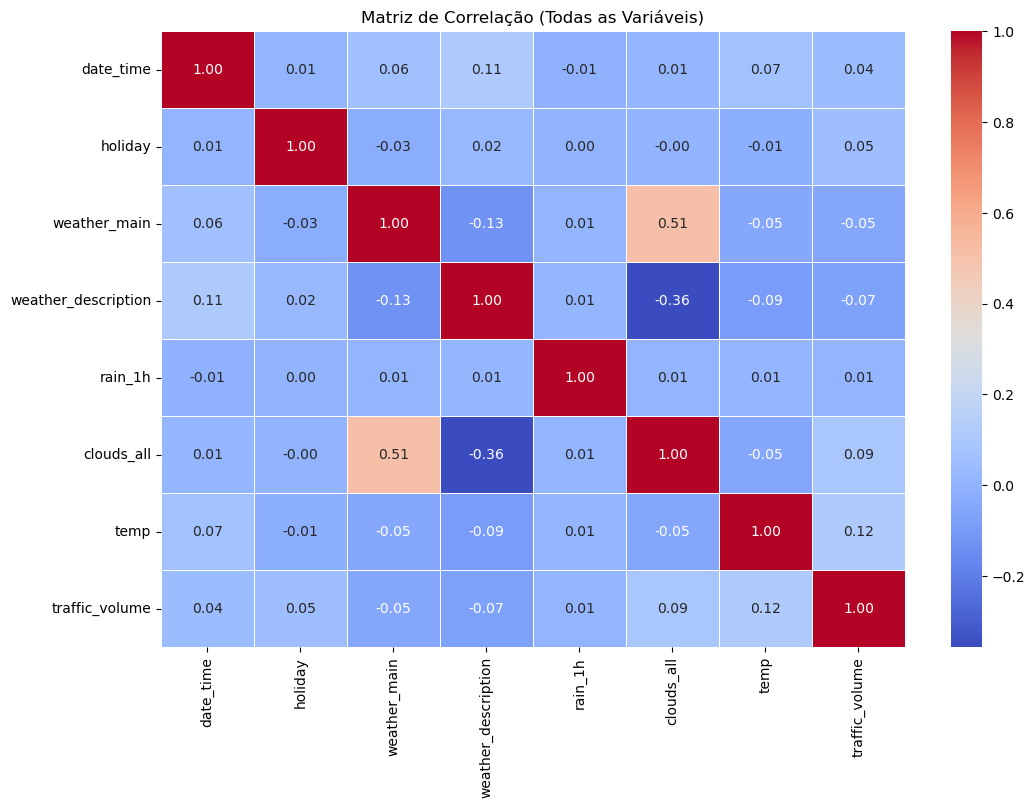

In [54]:
from sklearn.preprocessing import LabelEncoder

# Inicializar o codificador
label_encoder = LabelEncoder()

# Aplicar o codificador nas colunas categóricas
df_encoded = df.copy()

# Aplicar a codificação para todas as colunas não numéricas
for column in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[column] = label_encoder.fit_transform(df_encoded[column].astype(str))

# Calcular a matriz de correlação para o dataset completo
correlation_matrix_all = df_encoded.corr()

# Exibir a matriz de correlação
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_all, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação (Todas as Variáveis)')
plt.show()


<div class="alert alert-block alert-info">
Correlação com is_canceled:

A variável lead_time tem uma correlação positiva moderada com is_canceled (0.18), o que sugere que quanto maior o tempo de antecedência da reserva, maior a probabilidade de cancelamento.

adr (tarifa diária média) apresenta uma correlação de 0.13, o que indica que tarifas mais altas podem estar levemente associadas a um aumento na probabilidade de cancelamento.

total_of_special_requests tem uma correlação negativa de -0.12 com is_canceled, o que sugere que clientes que fazem mais pedidos especiais têm menor probabilidade de cancelar.

is_repeated_guest e previous_bookings_not_canceled apresentam uma correlação positiva de 0.44, o que indica que clientes que são hóspedes recorrentes tendem a ter um histórico de reservas não canceladas.

previous_cancellations e previous_bookings_not_canceled têm uma correlação de 0.39, o que mostra que clientes que tiveram cancelamentos prévios também podem ter um histórico de reservas bem-sucedidas.

adr e total_people mostram uma correlação de 0.39, o que indica que, em geral, um maior número de pessoas pode estar associado a tarifas diárias médias mais altas.

Variáveis como days_in_waiting_list e arrival_date_week_number têm correlações muito baixas com is_canceled, o que suegere que elas têm pouco impacto na previsão de cancelamento.

A variável required_car_parking_spaces tem uma correlação negativa baixa (-0.18) com is_canceled, o qe indica uma leve tendência de menor probabilidade de cancelamento quando é solicitado espaço de estacionamento.
</div>

<div class="alert alert-block alert-success"> 
Nesta fase, foi realizada uma análise detalhada dos dados, centrando-se nas variáveis numéricas e categóricas. A variável is_canceled foi identificada como a variável target, e a sua distribuição revelou um desbalanceamento, um fator relevante para a modelação, uma vez que pode afetar a performance dos modelos. Variáveis como lead_time e customer_type demonstraram correlações significativas com o cancelamento, o que orientou a seleção de características para a modelação.

A análise inicial dos dados revelou que variáveis como o tempo de antecedência da reserva (lead_time) e o tipo de cliente têm um impacto significativo na previsão de cancelamentos. Estas observações serviram de base para o pré-processamento e para a seleção de características.
</div>

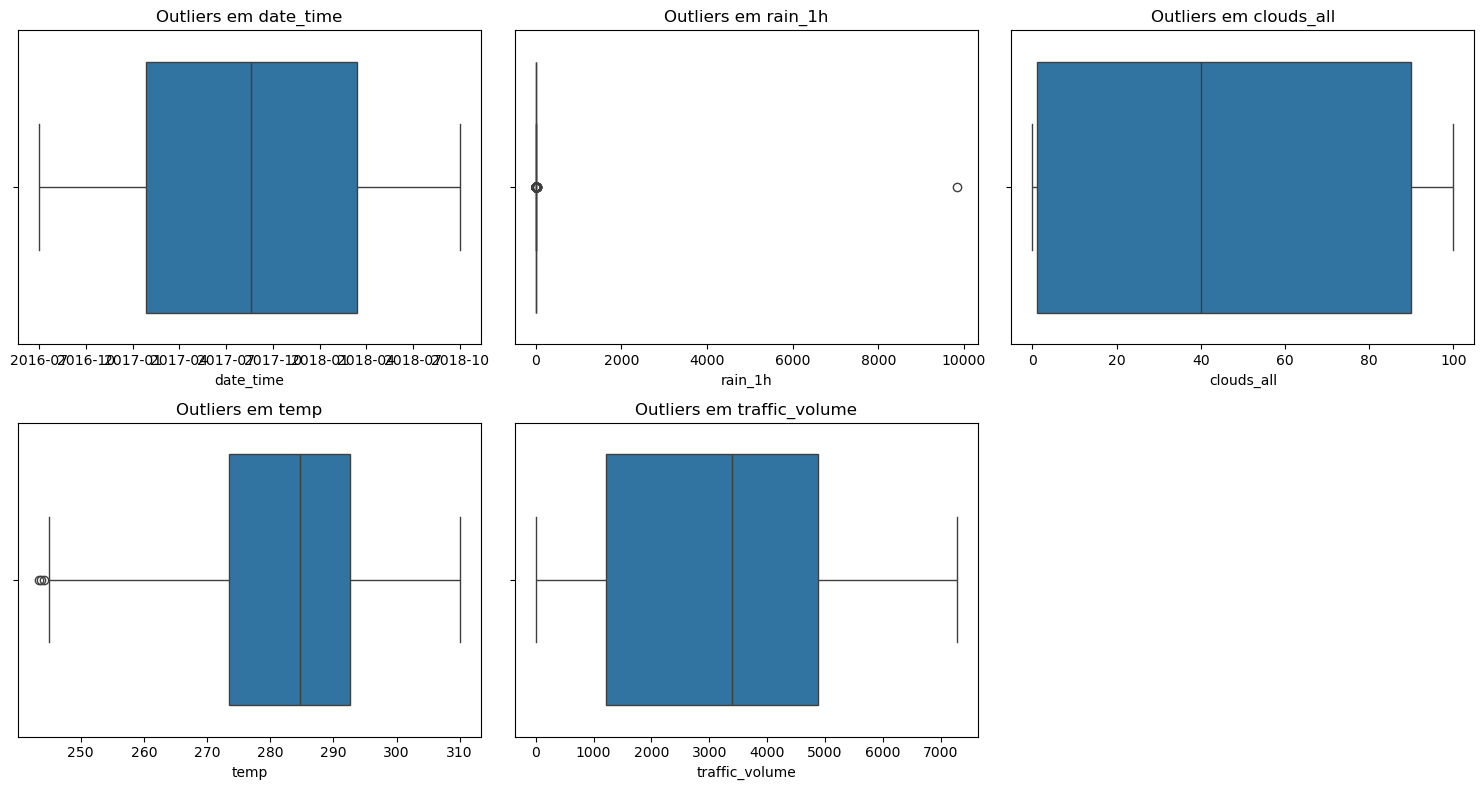

In [261]:
numerical_cols = [col for col in df.columns if col not in ['snow_1h'] and df[col].dtype != 'object']
plt.figure(figsize=(15, 8))
for i, var in enumerate(numerical_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x=df[var])
    plt.title(f'Outliers em {var}')
plt.tight_layout()
plt.show()

**Statistical models**

In [73]:
# Selecionar 3000 linhas aleatórias
df_sample = df_encoded.sample(n=3000, random_state=42)

# Definir a coluna 'date_time' como índice
df_sample = df_sample.set_index('date_time')

# Garantir que o índice inclua data + hora
df_sample = df_sample.sort_index()

df_sample

,holiday,weather_main,weather_description,rain_1h,clouds_all,temp,traffic_volume
date_time,,,,,,,
2016-07-02 06:00:00,7,1,2,0.0,75,285.83,1253
2016-07-02 10:00:00,7,1,4,0.0,20,294.67,3429
2016-07-02 11:00:00,7,1,24,0.0,40,295.89,3892
2016-07-02 20:00:00,7,1,24,0.0,40,296.99,2676
2016-07-02 22:00:00,7,1,4,0.0,20,292.09,2370
...,...,...,...,...,...,...,...
2018-09-29 04:00:00,7,0,26,0.0,1,274.25,425
2018-09-29 15:00:00,7,1,19,0.0,90,280.99,4564
2018-09-30 08:00:00,7,1,19,0.0,90,280.28,2002


In [75]:
df_sample['temp_celsius'] = df_sample['temp'] - 273.15

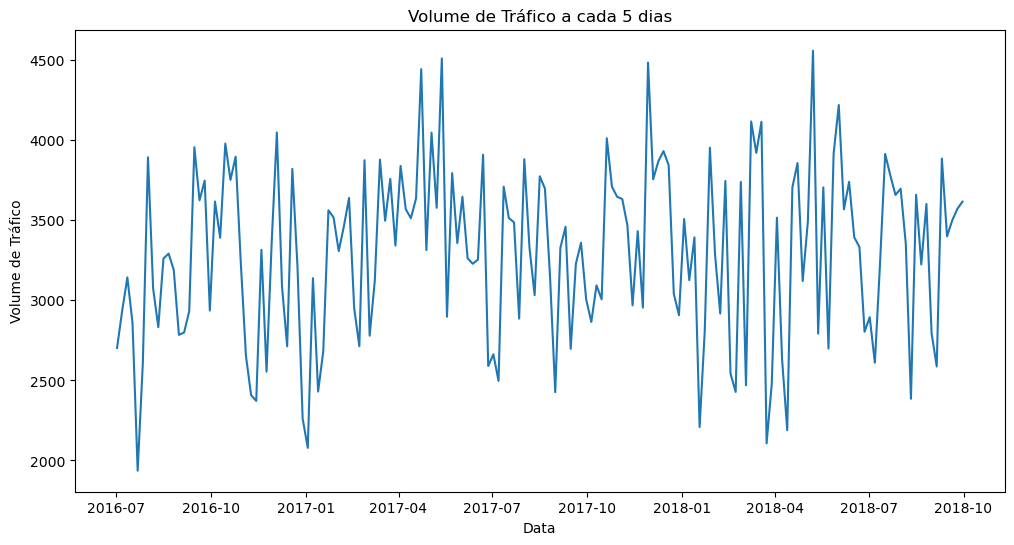

In [275]:
#Definiu-se com 5D para melhorar a visibilidade da serie graficamente
D_traffic = df_sample['traffic_volume'].resample('5D').mean().dropna()

plt.figure(figsize=(12, 6))
plt.plot(D_traffic)
plt.title('Volume de Tráfico a cada 5 dias')
plt.xlabel('Data')
plt.ylabel('Volume de Tráfico')
plt.show()

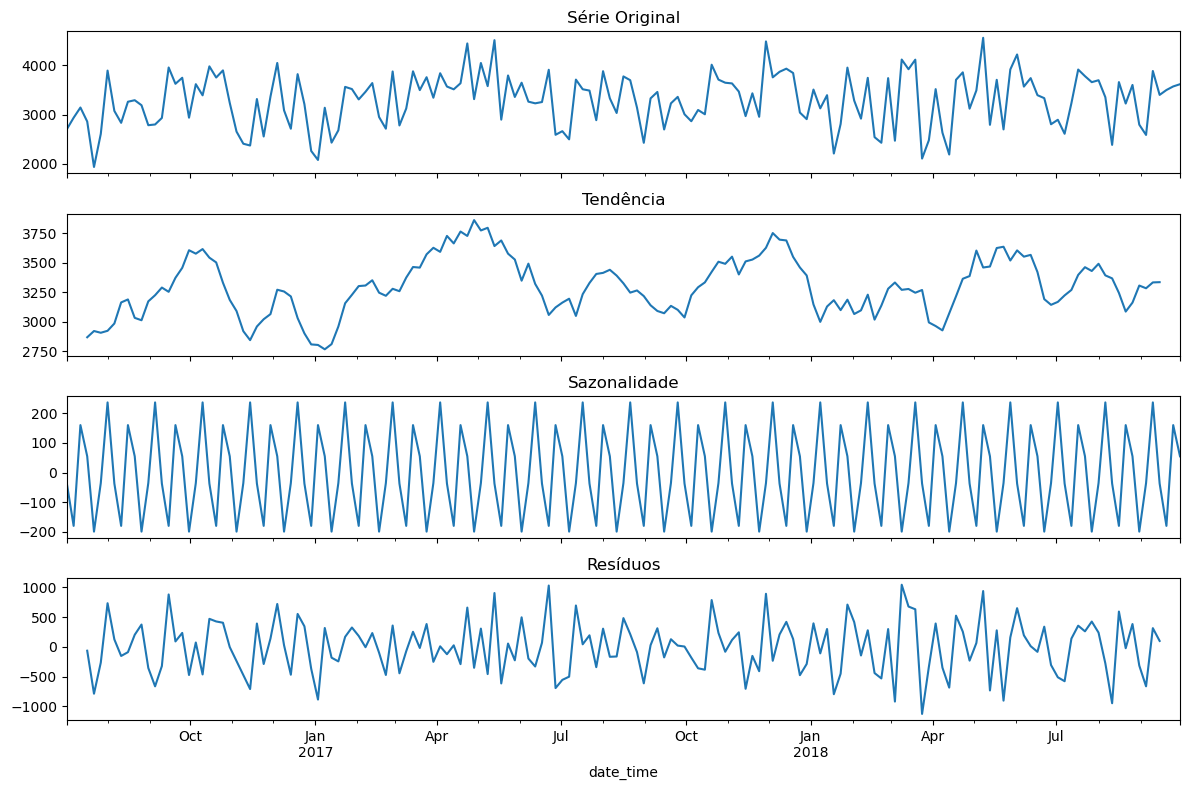

In [277]:
# Decomposição da série
decomposition = seasonal_decompose(D_traffic, model='additive', period=7)

fig, axes = plt.subplots(4, 1, figsize=(12, 8), sharex=True)

decomposition.observed.plot(ax=axes[0], title='Série Original')
decomposition.trend.plot(ax=axes[1], title='Tendência')
decomposition.seasonal.plot(ax=axes[2], title='Sazonalidade')
decomposition.resid.plot(ax=axes[3], title='Resíduos')

plt.tight_layout()
plt.show()


In [77]:
#Definir freq por hora
df_sample = df_sample.resample('h').mean()
df_sample = df_sample.ffill()

print(df_sample)

                     holiday  weather_main  weather_description  rain_1h  \
date_time                                                                  
2016-07-02 06:00:00      7.0           1.0                  2.0      0.0   
2016-07-02 07:00:00      7.0           1.0                  2.0      0.0   
2016-07-02 08:00:00      7.0           1.0                  2.0      0.0   
2016-07-02 09:00:00      7.0           1.0                  2.0      0.0   
2016-07-02 10:00:00      7.0           1.0                  4.0      0.0   
...                      ...           ...                  ...      ...   
2018-09-30 11:00:00      7.0           1.0                 19.0      0.0   
2018-09-30 12:00:00      7.0           1.0                 19.0      0.0   
2018-09-30 13:00:00      7.0           6.0                 13.0      0.0   
2018-09-30 14:00:00      7.0           6.0                 13.0      0.0   
2018-09-30 15:00:00      7.0           2.0                 11.0      0.0   

           

In [281]:
# Calcular o índice para 80% dos dados
train_size = int(len(df_sample) * 0.8)

# Dividir apenas a coluna 'traffic_volume' em treino e teste
train = df_sample['traffic_volume'].iloc[:train_size]  
test = df_sample['traffic_volume'].iloc[train_size:]

print(f'Quantidade de amostras no treino: {len(train)}')
print(f'Quantidade de amostras no teste: {len(test)}')

Quantidade de amostras no treino: 15752
Quantidade de amostras no teste: 3938


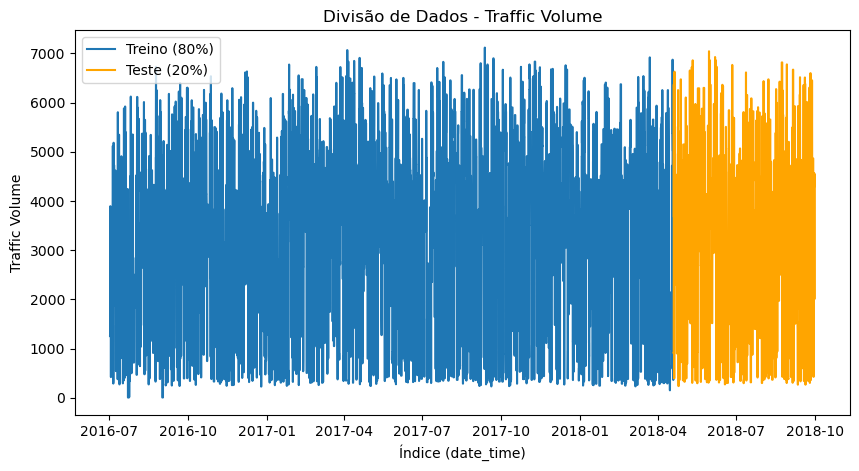

In [283]:
plt.figure(figsize=(10, 5))
plt.plot(train, label='Treino (80%)')
plt.plot(test, label='Teste (20%)', color='orange')
plt.legend()
plt.title('Divisão de Dados - Traffic Volume')
plt.xlabel('Índice (date_time)')
plt.ylabel('Traffic Volume')
plt.show()

In [285]:
result = adfuller(train)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
if result[1] < 0.05:
    print("A série de treino é estacionária")
else:
    print("A série de treino não é estacionária")

ADF Statistic: -14.450201150991662
p-value: 7.119295166864292e-27
A série de treino é estacionária


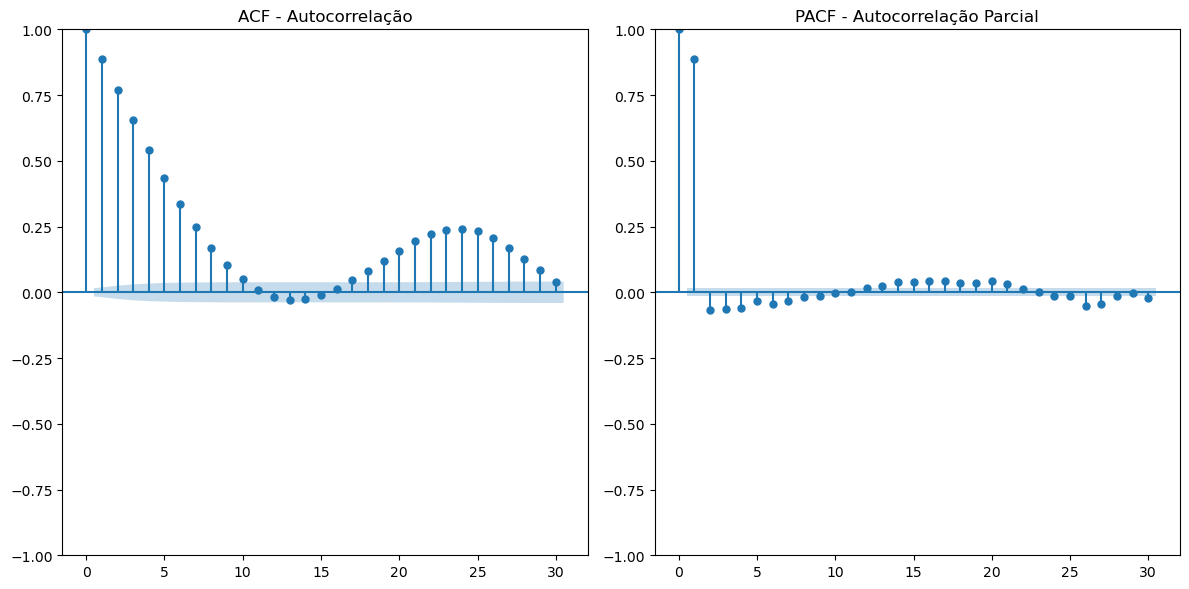

In [287]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# ACF e PACF
plot_acf(train, ax=axes[0], lags=30, title='ACF - Autocorrelação')
plot_pacf(train, ax=axes[1], lags=30, title='PACF - Autocorrelação Parcial')

plt.tight_layout()
plt.show()

In [289]:
def optimize_ARMA(train, order_list) -> pd.DataFrame:
    results = []
    for order in order_list:
        try:
            print(f"A testar modelo ARMA({order[0]}, {order[1]})")
            model = SARIMAX(train, order=(order[0], 0, order[1]), simple_differencing=False)
            model_fit = model.fit(disp=False) 
            aic = model_fit.aic 
            results.append([order, aic])
        except Exception as e:
            print(f"Erro no modelo ARMA({order[0]}, {order[1]}): {e}")
            continue
            
    result_df = pd.DataFrame(results, columns=['(p,q)', 'AIC'])
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    return result_df

# Definir a lista de combinações de (p, q) a serem testadas
order_list = [(p, q) for p in range(0, 4) for q in range(0, 4)]


In [291]:
result_df = optimize_ARMA(train, order_list)
print(result_df)

A testar modelo ARMA(0, 0)
A testar modelo ARMA(0, 1)
A testar modelo ARMA(0, 2)
A testar modelo ARMA(0, 3)
A testar modelo ARMA(1, 0)
A testar modelo ARMA(1, 1)
A testar modelo ARMA(1, 2)
A testar modelo ARMA(1, 3)
A testar modelo ARMA(2, 0)
A testar modelo ARMA(2, 1)
A testar modelo ARMA(2, 2)
A testar modelo ARMA(2, 3)
A testar modelo ARMA(3, 0)
A testar modelo ARMA(3, 1)
A testar modelo ARMA(3, 2)
A testar modelo ARMA(3, 3)
     (p,q)            AIC
0   (2, 3)  258825.805138
1   (2, 1)  258940.550645
2   (1, 2)  259618.379817
3   (3, 0)  259618.387714
4   (1, 3)  259619.203232
5   (3, 3)  259619.762621
6   (2, 0)  259619.828506
7   (1, 1)  259620.006496
8   (2, 2)  259620.074058
9   (3, 1)  259622.291054
10  (1, 0)  259623.836052
11  (3, 2)  259631.396827
12  (0, 3)  272309.136588
13  (0, 2)  278160.856808
14  (0, 1)  287900.286429
15  (0, 0)  304769.537051


                               SARIMAX Results                                
Dep. Variable:         traffic_volume   No. Observations:                15752
Model:               SARIMAX(2, 0, 3)   Log Likelihood             -129406.903
Date:                Sat, 21 Dec 2024   AIC                         258825.805
Time:                        13:34:43   BIC                         258871.793
Sample:                    07-02-2016   HQIC                        258841.027
                         - 04-19-2018                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.8573   1.79e-05   1.04e+05      0.000       1.857       1.857
ar.L2         -0.8573   1.76e-05  -4.86e+04      0.000      -0.857      -0.857
ma.L1         -0.9223      0.020    -45.629      0.0

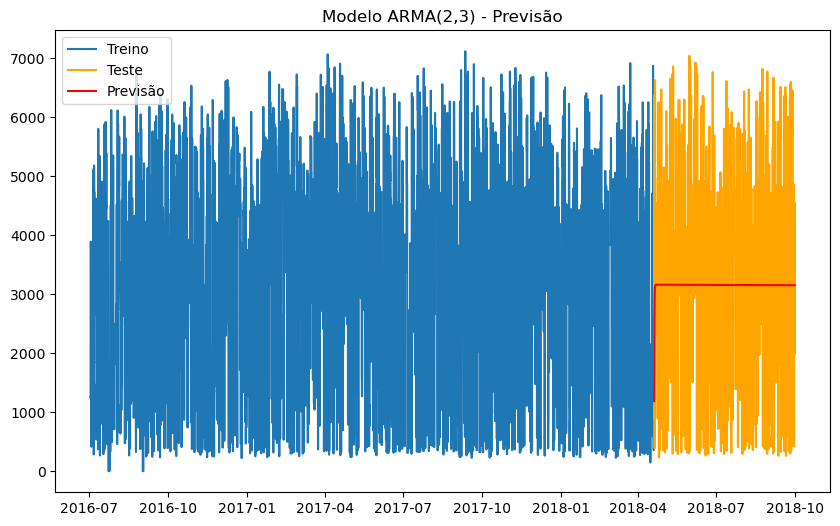

In [292]:
# Ajustar o modelo ARMA(2,3)
model = SARIMAX(train, order=(2, 0, 3), simple_differencing=False)
model_fit = model.fit(disp=False)

print(model_fit.summary())

forecast = model_fit.forecast(steps=len(test))

plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label='Treino')
plt.plot(test.index, test, label='Teste', color='orange')
plt.plot(test.index, forecast, label='Previsão', color='red')
plt.legend()
plt.title("Modelo ARMA(2,3) - Previsão")
plt.show()

In [293]:
residuals = model_fit.resid

residuals_test = acorr_ljungbox(residuals, lags=np.arange(1, 11, 1), return_df=True)

print(residuals_test['lb_pvalue'].describe())


count    1.000000e+01
mean     1.630890e-01
std      3.443973e-01
min      1.615607e-17
25%      1.155878e-09
50%      5.467613e-09
75%      1.601679e-08
max      8.576666e-01
Name: lb_pvalue, dtype: float64


In [ ]:
def optimize_SARIMA(train, p_values, d_values, q_values, P_values, D_values, Q_values, m):
    results = []
    for order in product(p_values, d_values, q_values):  # Não sazonais
        for seasonal_order in product(P_values, D_values, Q_values, [m]):  # Sazonais
            try:
                # Ajustar o modelo SARIMA
                model = SARIMAX(train, 
                                order=order, 
                                seasonal_order=seasonal_order, 
                                simple_differencing=False)
                model_fit = model.fit(disp=False)
                aic = model_fit.aic
                results.append([order, seasonal_order, aic])
                print(f"A testar SARIMA{order}{seasonal_order} - AIC:{aic}")
            except Exception as e:
                print(f"Erro com SARIMA{order}{seasonal_order}: {e}")
                continue
                
    # Ordenar resultados pelo menor AIC
    result_df = pd.DataFrame(results, columns=['Order', 'Seasonal_Order', 'AIC'])
    result_df = result_df.sort_values(by='AIC').reset_index(drop=True)
    return result_df

# Definir os intervalos de parâmetros
p_values = range(0, 2)   # Ordem AR não sazonal
d_values = range(0, 2)   # Diferenciação não sazonal
q_values = range(0, 2)   # Ordem MA não sazonal
P_values = range(0, 2)   # Ordem AR sazonal
D_values = range(0, 2)   # Diferenciação sazonal
Q_values = range(0, 2)   # Ordem MA sazonal
m = 24                  # Periodicidade sazonal

# Executar a otimização
print("Otimização SARIMA...")
results = optimize_SARIMA(train, p_values, d_values, q_values, P_values, D_values, Q_values, m)

# Exibir os melhores modelos
print("\nTop 5 modelos SARIMA com menor AIC:")
print(results.head())


In [ ]:
# Selecionar o melhor modelo
best_order = results.iloc[0]['Order']
best_seasonal_order = results.iloc[0]['Seasonal_Order']

print(f"Melhor modelo: SARIMA{best_order}{best_seasonal_order}")

# Ajustar o modelo
best_model = SARIMAX(train, 
                     order=best_order, 
                     seasonal_order=best_seasonal_order, 
                     simple_differencing=False)

best_model_fit = best_model.fit(disp=False)

print(best_model_fit.summary())


In [ ]:
# Plotar ACF dos resíduos
residuals = best_model_fit.resid
sm.graphics.tsa.plot_acf(residuals, lags=30)
plt.title("ACF dos Resíduos")
plt.show()

# Teste de Ljung-Box
from statsmodels.stats.diagnostic import acorr_ljungbox
ljung_box_test = acorr_ljungbox(residuals, lags=np.arange(1, 11), return_df=True)
print("Teste de Ljung-Box:")
print(ljung_box_test)


In [ ]:
# Gerar previsões
forecast = final_model_fit.forecast(steps=len(test))
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE do melhor modelo: {rmse}")


**Machine learning models**

In [56]:
train_size = int(len(df_encoded) * 0.80)
train_ml, test_ml = df_encoded[:train_size], df_encoded[train_size:]
print(f"Tamanho do conjunto de treino: {len(train_ml)}, teste: {len(test_ml)}")

Tamanho do conjunto de treino: 18885, teste: 4722


In [58]:
def create_sliding_window(df_encoded, n_steps, m_steps):
    X, y = [], []
    for i in range(len(df_encoded) - n_steps - m_steps + 1):
        X.append(df_encoded[i:i+n_steps])
        y.append(df_encoded[i+n_steps:i+n_steps+m_steps])
    return np.array(X), np.array(y)


In [60]:
n_steps = 6  
m_steps = 1  

X, y = create_sliding_window(df_encoded['traffic_volume'].values, n_steps, m_steps)
y = y.ravel()

Random Forest - MAE: 253.5581, MSE: 143766.0925, MAPE: 0.2113
Gradient Boosting - MAE: 307.0688, MSE: 187867.2712, MAPE: 0.2627
Decision Tree - MAE: 335.5363, MSE: 297059.5469, MAPE: 0.2851
KNeighbors Regressor - MAE: 259.5372, MSE: 155137.4056, MAPE: 0.2124
Support Vector Regression (SVR) - MAE: 677.5384, MSE: 785317.5997, MAPE: 1.1462
Linear Regression - MAE: 432.8525, MSE: 355067.3613, MAPE: 0.4764

Resultados de Avaliação:
                             Model         MAE            MSE      MAPE
0                    Random Forest  253.558066  143766.092494  0.211341
1                Gradient Boosting  307.068804  187867.271183  0.262680
2                    Decision Tree  335.536327  297059.546918  0.285082
3             KNeighbors Regressor  259.537174  155137.405575  0.212403
4  Support Vector Regression (SVR)  677.538380  785317.599652  1.146245
5                Linear Regression  432.852453  355067.361276  0.476433


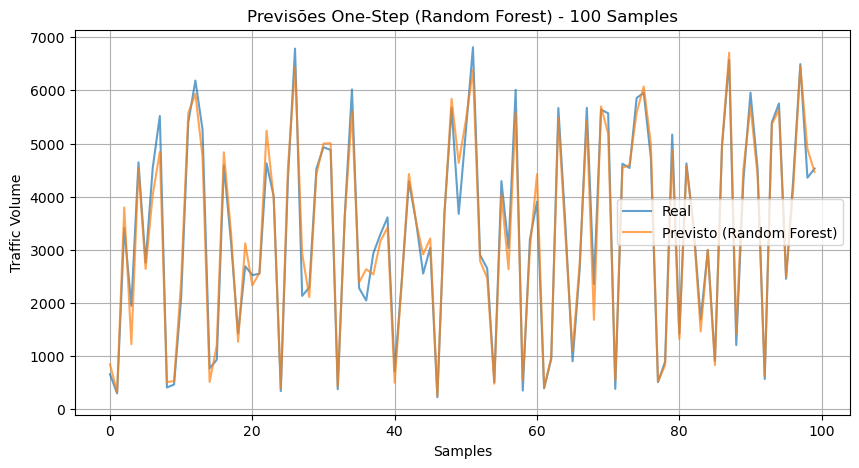

In [62]:
# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

# Lista de algoritmos de regressão
regressors = {
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'KNeighbors Regressor': KNeighborsRegressor(n_neighbors=5),
    'Support Vector Regression (SVR)': SVR(kernel='rbf'),
    'Linear Regression': LinearRegression()
}

# Avaliação dos modelos
results = []
for name, model in regressors.items():
    model.fit(X_train, y_train) 
    y_pred = model.predict(X_test) 
    
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    results.append({'Model': name, 'MAE': mae, 'MSE': mse, 'MAPE': mape})
    print(f"{name} - MAE: {mae:.4f}, MSE: {mse:.4f}, MAPE: {mape:.4f}")

results_df = pd.DataFrame(results)
print("\nResultados de Avaliação:")
print(results_df)

best_model_name = results_df.loc[results_df['MAE'].idxmin(), 'Model']
best_model = regressors[best_model_name]
y_pred_best = best_model.predict(X_test)

num_samples = 100
plt.figure(figsize=(10, 5))
plt.plot(y_test[:num_samples], label='Real', alpha=0.7)
plt.plot(y_pred_best[:num_samples], label=f'Previsto ({best_model_name})', alpha=0.7)
plt.legend()
plt.title(f"Previsões One-Step ({best_model_name}) - {num_samples} Samples")
plt.xlabel('Samples')
plt.ylabel('Traffic Volume')
plt.grid()
plt.show()



Métricas para Multi-Step Forecasting:
MAE: 358.0930, MSE: 324209.2716, MAPE: 0.3118


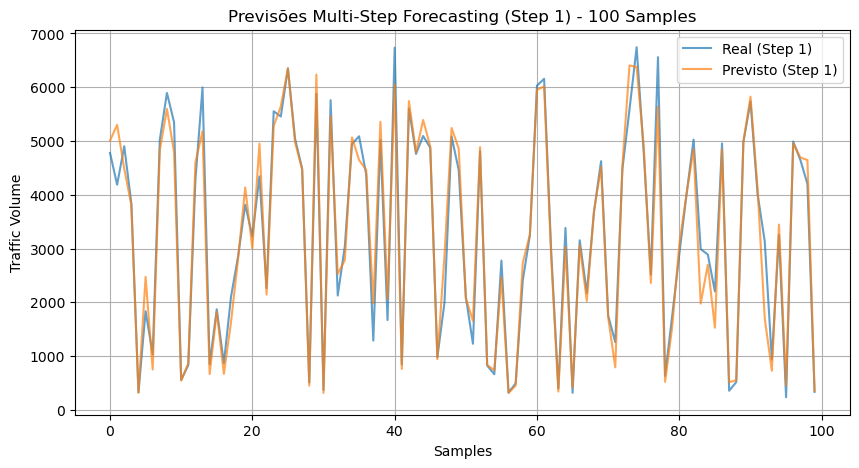

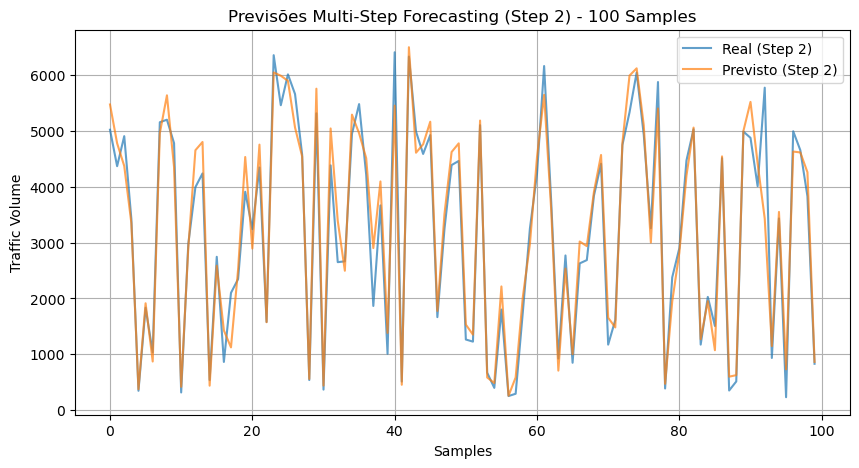

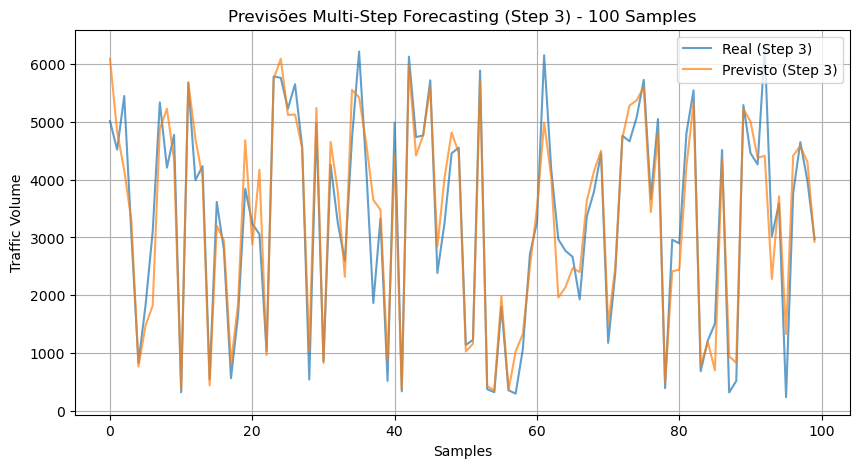

In [63]:
#Multi-step
m_steps_multi_step = 3  

# Criar janelas deslizantes para multi-step forecasting
X_multi_step, y_multi_step = create_sliding_window(df_encoded['traffic_volume'].values, n_steps, m_steps_multi_step)

X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi_step, y_multi_step, test_size=0.2, random_state=42)

# Verificar e tratar valores NaN em y_train_multi
if np.isnan(y_train_multi).any():
    y_train_multi = np.nan_to_num(y_train_multi, nan=np.nanmean(y_train_multi))

model = RandomForestRegressor(random_state=42)
model.fit(X_train_multi, y_train_multi)

y_pred_multi_step = model.predict(X_test_multi)

mae_multi_step = mean_absolute_error(y_test_multi, y_pred_multi_step)
mse_multi_step = mean_squared_error(y_test_multi, y_pred_multi_step)
mape_multi_step = mean_absolute_percentage_error(y_test_multi, y_pred_multi_step)

print("\nMétricas para Multi-Step Forecasting:")
print(f"MAE: {mae_multi_step:.4f}, MSE: {mse_multi_step:.4f}, MAPE: {mape_multi_step:.4f}")

num_samples = 100

for step in range(m_steps_multi_step):
    plt.figure(figsize=(10, 5))
    plt.plot(y_test_multi[:num_samples, step], label=f"Real (Step {step + 1})", alpha=0.7)
    plt.plot(y_pred_multi_step[:num_samples, step], label=f"Previsto (Step {step + 1})", alpha=0.7)
    plt.legend()
    plt.title(f"Previsões Multi-Step Forecasting (Step {step + 1}) - {num_samples} Samples")
    plt.xlabel("Samples")
    plt.ylabel("Traffic Volume")
    plt.grid()
    plt.show()



**Deep Learning**

In [79]:
def slideWindow(series, n, m):
    X, y = [], []
    for i in range(len(series) - n - m + 1):
        X.append(series[i:i+n])
        y.append(series[i+n:i+n+m])
    return np.array(X), np.array(y)

# Dados a serem usados: temperatura
series = df_sample['temp_celsius'].dropna().values

# Criar janelas com n=6 (input) e m=1 (output)
n, m = 6, 1
if len(series) < n + m:
    raise ValueError(f"A série temporal é muito curta ({len(series)} amostras) para criar janelas com n={n} e m={m}. Ajuste os parâmetros.")

X, y = slideWindow(series, n, m)

# Verificar se X e y foram gerados corretamente
if len(X) == 0 or len(y) == 0:
    raise ValueError("A função slideWindow não gerou dados. Verifique os parâmetros n e m.")


In [81]:
train_size = int(len(X) * 0.7)
val_size = int(len(X) * 0.15)
test_size = len(X) - train_size - val_size

# Garantir que as divisões tenham tamanho válido
if train_size == 0 or val_size == 0 or test_size == 0:
    raise ValueError(f"O número de amostras é insuficiente para dividir em treino, validação e teste. Total de amostras: {len(X)}")

# Realizar a divisão
X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]

scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

# Ajustar e transformar X
X_train = scaler_X.fit_transform(X_train)
X_val = scaler_X.transform(X_val)
X_test = scaler_X.transform(X_test)

# Ajustar e transformar y
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1))
y_val = scaler_y.transform(y_val.reshape(-1, 1))
y_test = scaler_y.transform(y_test.reshape(-1, 1))

# Verificar as formas dos dados
print(f"X_train: {X_train.shape}, X_val: {X_val.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_val: {y_val.shape}, y_test: {y_test.shape}")

X_train: (13778, 6), X_val: (2952, 6), X_test: (2954, 6)
y_train: (13778, 1), y_val: (2952, 1), y_test: (2954, 1)


In [83]:
#converter para tensores
X_train, X_val, X_test = map(lambda x: np.expand_dims(x, -1), [X_train, X_val, X_test])
y_train, y_val, y_test = map(lambda y: np.expand_dims(y, -1), [y_train, y_val, y_test])

In [464]:
# Custom wrapper for the GRU model to use with GridSearchCV
class KerasGRURegressor(BaseEstimator, RegressorMixin):
    def __init__(self, latent_dim=5, optimizer='RMSprop', dropout_rate=0.2, batch_size=32, epochs=10):
        self.latent_dim = latent_dim
        self.optimizer = optimizer
        self.dropout_rate = dropout_rate
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = None

    def fit(self, X, y):
        # Ensure input data is 3D
        X = np.expand_dims(X, axis=-1) if X.ndim == 2 else X
        self.model = create_model(
            latent_dim=self.latent_dim,
            optimizer=self.optimizer,
            dropout_rate=self.dropout_rate,
            input_shape=(X.shape[1], X.shape[2])
        )
        self.model.fit(
            X, y,
            batch_size=self.batch_size,
            epochs=self.epochs,
            verbose=0
        )
        return self

    def predict(self, X):
        X = np.expand_dims(X, axis=-1) if X.ndim == 2 else X
        return self.model.predict(X).flatten()

# Parameters for GridSearch
param_grid = {
    'latent_dim': [5, 10, 20],
    'optimizer': ['RMSprop', 'adam'],
    'dropout_rate': [0.2, 0.3],
    'batch_size': [16, 32],
    'epochs': [10, 20]
}

grid = GridSearchCV(
    estimator=KerasGRURegressor(),
    param_grid=param_grid,
    cv=3,
    verbose=2,
    scoring='neg_mean_squared_error'
)

grid_result = grid.fit(X_train, y_train)

best_params = grid_result.best_params_
print("Best parameters found:", best_params)


Fitting 3 folds for each of 48 candidates, totalling 144 fits
144/144 ━━━━━━━━━━━━━━━━━━━━ 8s 40ms/step
[CV] END batch_size=16, dropout_rate=0.2, epochs=10, latent_dim=5, optimizer=RMSprop; total time= 2.4min
144/144 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
[CV] END batch_size=16, dropout_rate=0.2, epochs=10, latent_dim=5, optimizer=RMSprop; total time=  50.5s
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[CV] END batch_size=16, dropout_rate=0.2, epochs=10, latent_dim=5, optimizer=RMSprop; total time=  17.0s
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[CV] END batch_size=16, dropout_rate=0.2, epochs=10, latent_dim=5, optimizer=adam; total time=  12.4s
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[CV] END batch_size=16, dropout_rate=0.2, epochs=10, latent_dim=5, optimizer=adam; total time=  11.8s
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[CV] END batch_size=16, dropout_rate=0.2, epochs=10, latent_dim=5, optimizer=adam; total time=  11.2s
144/144 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[CV] END batch_size=16, dropo

In [85]:
# Modelos GRU e LSTM para one-step forecasting

# Parâmetros
HORIZON = 1
LATENT_DIM = 5
BATCH_SIZE = 16
EPOCHS = 10

GRU_earlystop = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    restore_best_weights=True
)

def create_gru_model(input_shape, horizon=HORIZON, latent_dim=LATENT_DIM):
    model = Sequential([
        GRU(latent_dim, activation='relu', input_shape=input_shape),
        Dense(horizon)
    ])
    model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse')
    return model

def create_lstm_model(input_shape, horizon=HORIZON, latent_dim=LATENT_DIM):
    model = Sequential([
        LSTM(latent_dim, activation='relu', input_shape=input_shape),
        Dense(horizon)
    ])
    model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mse')
    return model



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 5)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 126 (504.00 B)

 Trainable params: 126 (504.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0066 - val_loss: 9.4684e-04
Epoch 2/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.5050e-04 - val_loss: 8.4067e-04
Epoch 3/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.3317e-04 - val_loss: 8.0227e-04
Epoch 4/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.5684e-04 - val_loss: 7.7278e-04
Epoch 5/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.1523e-04 - val_loss: 0.0012
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


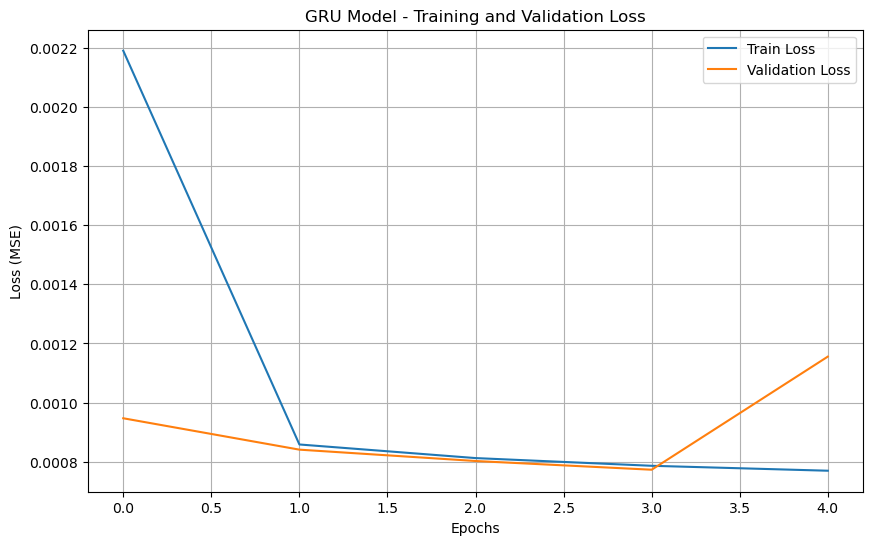

In [105]:
# GRU
gru_model = create_gru_model(input_shape=X_train.shape[1:], horizon=HORIZON)

gru_model.summary()

# Treino
gru_model_history = gru_model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    callbacks=[GRU_earlystop],
    verbose=1
)

# Previsão
y_pred_gru = gru_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(gru_model_history.history['loss'], label='Train Loss')
plt.plot(gru_model_history.history['val_loss'], label='Validation Loss')
plt.title('GRU Model - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 5)              │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 146 (584.00 B)

 Trainable params: 146 (584.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.0976 - val_loss: 0.0024
Epoch 2/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0022 - val_loss: 0.0029
Epoch 3/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 4/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 5/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0014 - val_loss: 0.0015
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


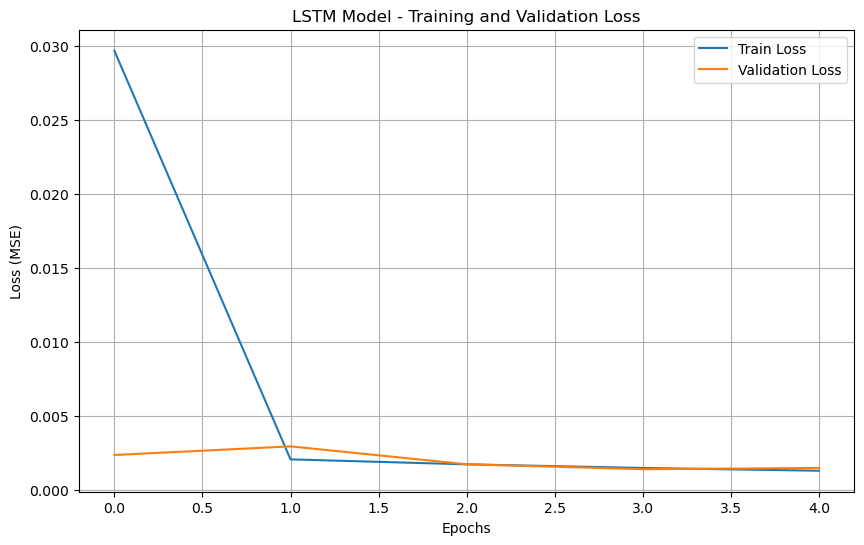

In [106]:
lstm_model = create_lstm_model(input_shape=X_train.shape[1:], horizon=HORIZON)
lstm_model.summary()

lstm_model_history = lstm_model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    callbacks=[GRU_earlystop],
    verbose=1
)

y_pred_lstm = lstm_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(lstm_model_history.history['loss'], label='Train Loss')
plt.plot(lstm_model_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()





Avaliação GRU (One-Step):
MAE = 0.0176, MSE = 0.0011, MAPE = 2.22%

Avaliação LSTM (One-Step):
MAE = 0.0361, MSE = 0.0029, MAPE = 4.62%


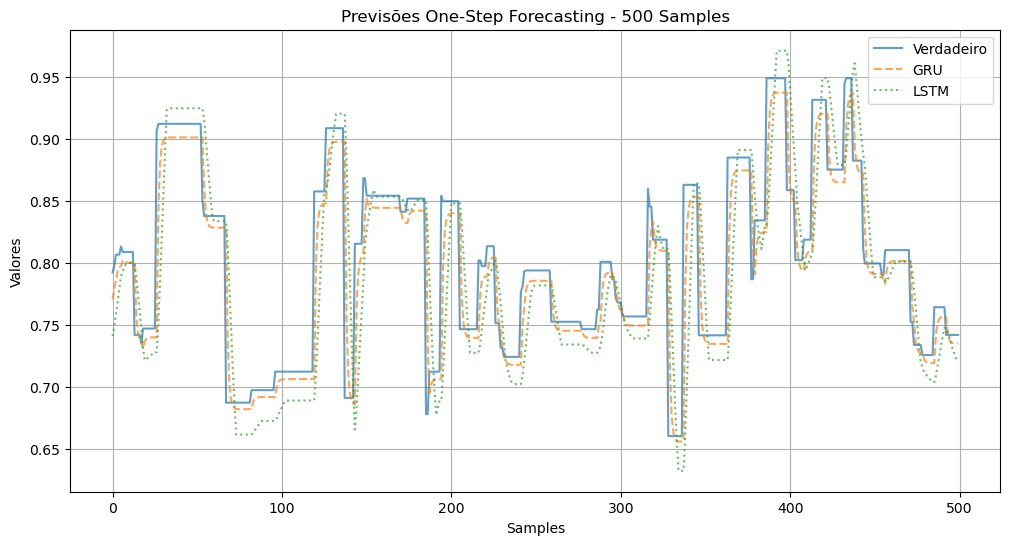

In [119]:
y_pred_gru_one_step = y_pred_gru[:, 0]  # Extrair o primeiro passo
y_pred_lstm_one_step = y_pred_lstm[:, 0]  
y_test_one_step = y_test.squeeze() 

# Avaliar previsões para One-Step Forecasting
def evaluate_one_step(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mae, mse, mape

gru_mae, gru_mse, gru_mape = evaluate_one_step(y_test_one_step, y_pred_gru_one_step)

lstm_mae, lstm_mse, lstm_mape = evaluate_one_step(y_test_one_step, y_pred_lstm_one_step)

print("\nAvaliação GRU (One-Step):")
print(f"MAE = {gru_mae:.4f}, MSE = {gru_mse:.4f}, MAPE = {gru_mape:.2f}%")

print("\nAvaliação LSTM (One-Step):")
print(f"MAE = {lstm_mae:.4f}, MSE = {lstm_mse:.4f}, MAPE = {lstm_mape:.2f}%")

num_samples = 500

plt.figure(figsize=(12, 6))
plt.plot(y_test_one_step[:num_samples], label="Verdadeiro", alpha=0.7)
plt.plot(y_pred_gru_one_step[:num_samples], label="GRU", linestyle="--", alpha=0.7)
plt.plot(y_pred_lstm_one_step[:num_samples], label="LSTM", linestyle=":", alpha=0.7)
plt.legend()
plt.title(f"Previsões One-Step Forecasting - {num_samples} Samples")
plt.xlabel("Samples")
plt.ylabel("Valores")
plt.grid()
plt.show()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_2 (GRU)                     │ (None, 5)              │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138 (552.00 B)

 Trainable params: 138 (552.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 0.0374 - val_loss: 9.0063e-04
Epoch 2/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.0483e-04 - val_loss: 8.1652e-04
Epoch 3/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.9919e-04 - val_loss: 7.9130e-04
Epoch 4/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 8.2521e-04 - val_loss: 7.7378e-04
Epoch 5/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7.7650e-04 - val_loss: 8.9276e-04
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


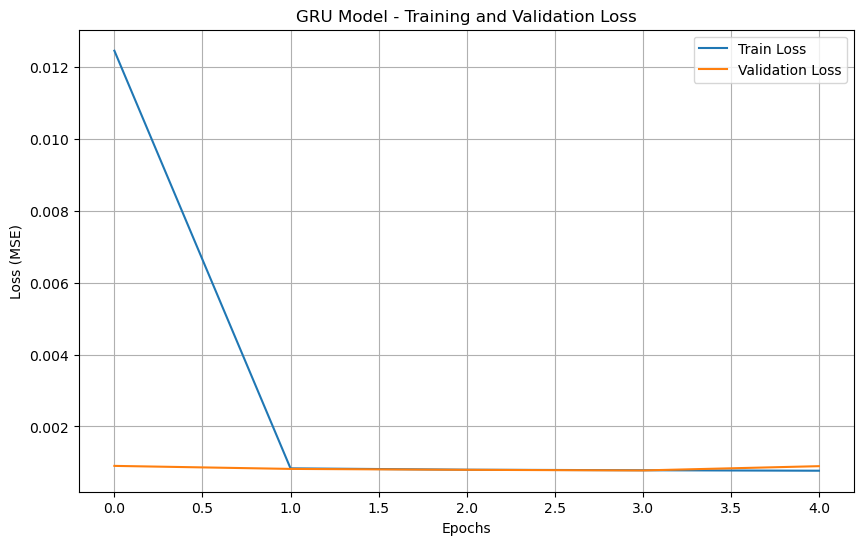

In [111]:
#Multi-step

# Parâmetros
HORIZON = 3  # Prever os próximos 3 passos
LATENT_DIM = 5
BATCH_SIZE = 16
EPOCHS = 10

# Treino com GRU
gru_model = create_gru_model(input_shape=X_train.shape[1:], horizon=HORIZON)
gru_model.summary()

gru_model_history = gru_model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    callbacks=[GRU_earlystop],
    verbose=1
)

# Previsão com GRU
y_pred_gru = gru_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(gru_model_history.history['loss'], label='Train Loss')
plt.plot(gru_model_history.history['val_loss'], label='Validation Loss')
plt.title('GRU Model - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()



Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 5)              │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158 (632.00 B)

 Trainable params: 158 (632.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.1139 - val_loss: 0.0024
Epoch 2/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0024 - val_loss: 0.0021
Epoch 3/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 4/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 5/10
862/862 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0019 - val_loss: 0.0017
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


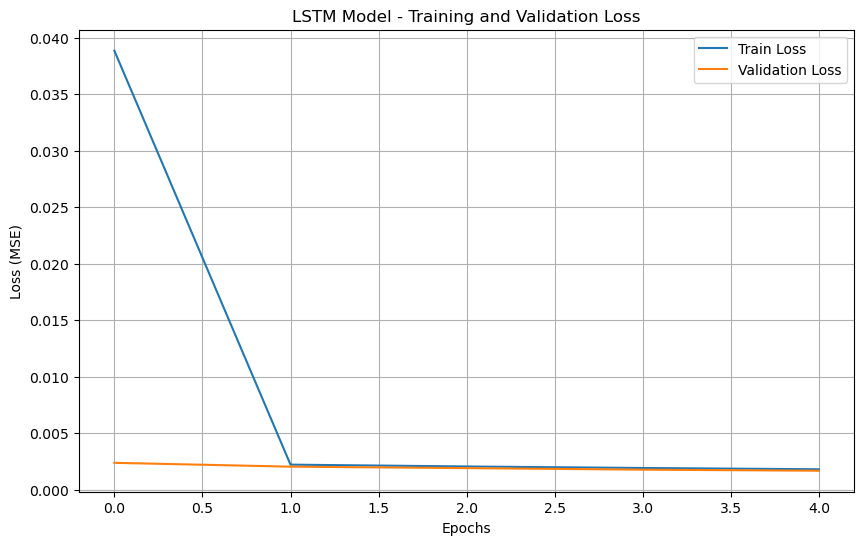

In [112]:
# Treino com LSTM
lstm_model = create_lstm_model(input_shape=X_train.shape[1:], horizon=HORIZON)
lstm_model.summary()

lstm_model_history = lstm_model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    callbacks=[GRU_earlystop],
    verbose=1
)

# Previsão com LSTM
y_pred_lstm = lstm_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.plot(lstm_model_history.history['loss'], label='Train Loss')
plt.plot(lstm_model_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model - Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid()
plt.show()



Avaliação GRU (3 passos):
Passo 1: MAE = 3256.0508, MSE = 14284508.9039, MAPE = 99.92%
Passo 2: MAE = 3269.8181, MSE = 14421156.9948, MAPE = 99.93%
Passo 3: MAE = 3266.9070, MSE = 14427067.6263, MAPE = 99.92%
Média: MAE = 3264.2586, MSE = 14377577.8417, MAPE = 99.92%

Avaliação LSTM (3 passos):
Passo 1: MAE = 3256.0533, MSE = 14284529.2991, MAPE = 99.92%
Passo 2: MAE = 3269.8439, MSE = 14421327.6736, MAPE = 99.93%
Passo 3: MAE = 3266.9206, MSE = 14427158.9644, MAPE = 99.92%
Média: MAE = 3264.2726, MSE = 14377671.9790, MAPE = 99.92%


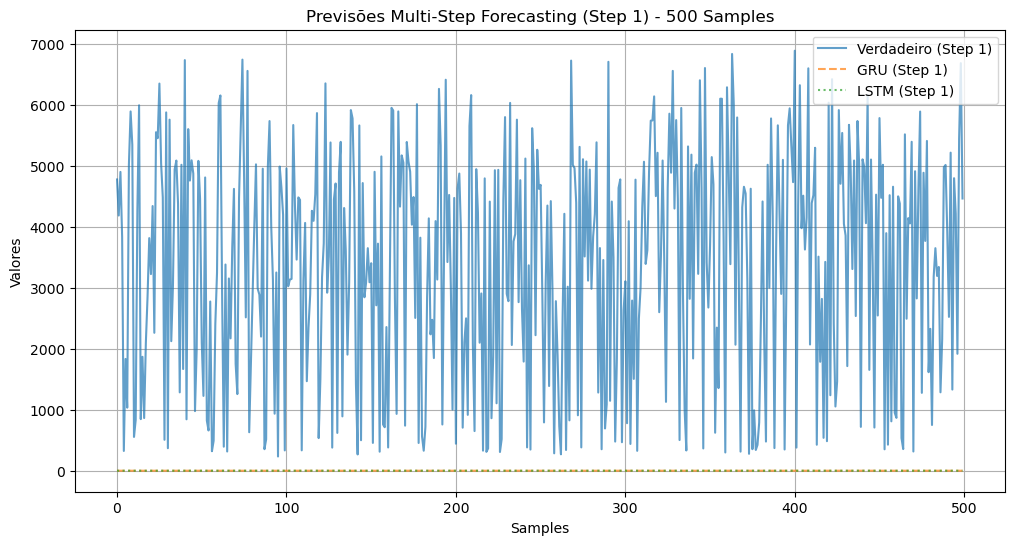

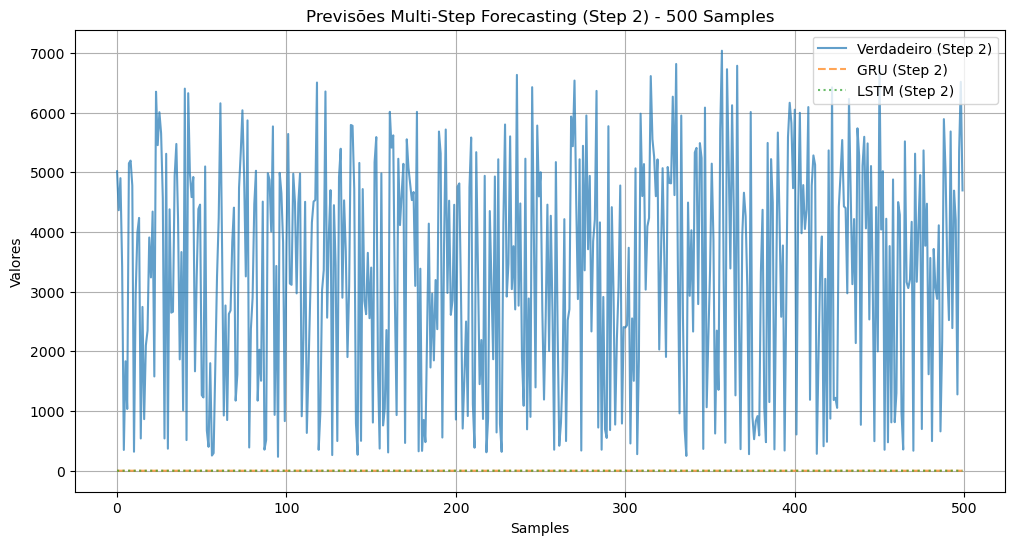

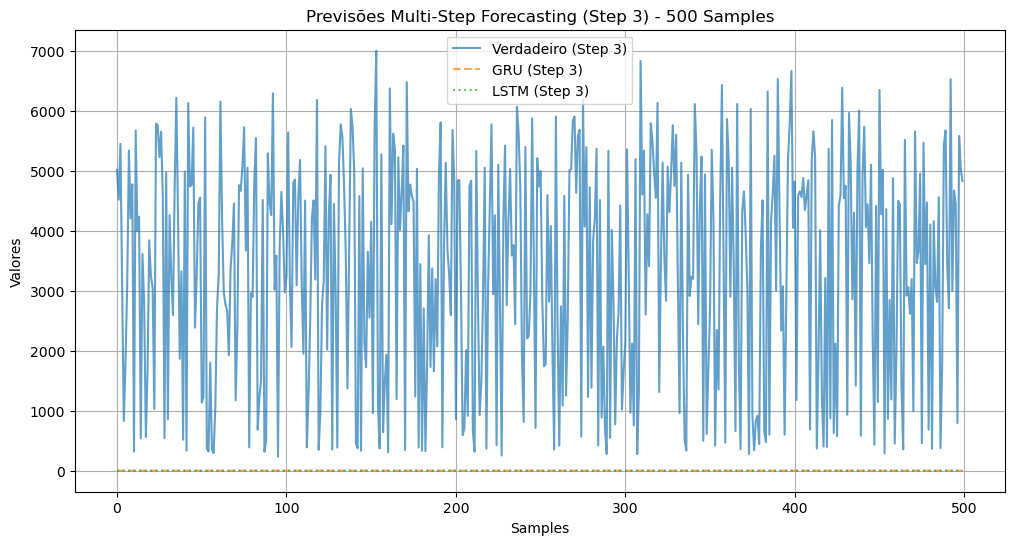

In [113]:
# Avaliar previsões para Multi-Step Forecasting (3 passos)
# Ajustar y_test_multi para ter o mesmo número de amostras que y_pred_gru
if y_test_multi.shape[0] != y_pred_gru.shape[0]:
    y_test_multi = y_test_multi[:y_pred_gru.shape[0], :]

def evaluate_multi_3_steps(y_true, y_pred):
    mae_steps = []
    mse_steps = []
    mape_steps = []

    for step in range(3):  
        mae = mean_absolute_error(y_true[:, step], y_pred[:, step])
        mse = mean_squared_error(y_true[:, step], y_pred[:, step])
        mape = np.mean(np.abs((y_true[:, step] - y_pred[:, step]) / y_true[:, step])) * 100
        mae_steps.append(mae)
        mse_steps.append(mse)
        mape_steps.append(mape)

    return mae_steps, mse_steps, mape_steps, np.mean(mae_steps), np.mean(mse_steps), np.mean(mape_steps)

gru_mae_steps, gru_mse_steps, gru_mape_steps, gru_mae_avg, gru_mse_avg, gru_mape_avg = evaluate_multi_3_steps(y_test_multi, y_pred_gru)

lstm_mae_steps, lstm_mse_steps, lstm_mape_steps, lstm_mae_avg, lstm_mse_avg, lstm_mape_avg = evaluate_multi_3_steps(y_test_multi, y_pred_lstm)

print("\nAvaliação GRU (3 passos):")
for i in range(3):
    print(f"Passo {i+1}: MAE = {gru_mae_steps[i]:.4f}, MSE = {gru_mse_steps[i]:.4f}, MAPE = {gru_mape_steps[i]:.2f}%")
print(f"Média: MAE = {gru_mae_avg:.4f}, MSE = {gru_mse_avg:.4f}, MAPE = {gru_mape_avg:.2f}%")

print("\nAvaliação LSTM (3 passos):")
for i in range(3):
    print(f"Passo {i+1}: MAE = {lstm_mae_steps[i]:.4f}, MSE = {lstm_mse_steps[i]:.4f}, MAPE = {lstm_mape_steps[i]:.2f}%")
print(f"Média: MAE = {lstm_mae_avg:.4f}, MSE = {lstm_mse_avg:.4f}, MAPE = {lstm_mape_avg:.2f}%")

num_samples = 500

for step in range(3):  # Para os 3 passos
    plt.figure(figsize=(12, 6))
    plt.plot(y_test_multi[:num_samples, step], label=f"Verdadeiro (Step {step + 1})", alpha=0.7)
    plt.plot(y_pred_gru[:num_samples, step], label=f"GRU (Step {step + 1})", linestyle="--", alpha=0.7)
    plt.plot(y_pred_lstm[:num_samples, step], label=f"LSTM (Step {step + 1})", linestyle=":", alpha=0.7)
    plt.legend()
    plt.title(f"Previsões Multi-Step Forecasting (Step {step + 1}) - {num_samples} Samples")
    plt.xlabel("Samples")
    plt.ylabel("Valores")
    plt.grid()
    plt.show()


In [121]:
# Baseline model: Predicting with historical average (mean of train set)
train, test = train_test_split(df, test_size=0.2, shuffle=False)

historical_mean = train['traffic_volume'].mean()
test['baseline_prediction'] = historical_mean

# Compute baseline metrics
mae = mean_absolute_error(test['traffic_volume'], test['baseline_prediction'])
mse = mean_squared_error(test['traffic_volume'], test['baseline_prediction'])
mape = (abs(test['traffic_volume'] - test['baseline_prediction']) / test['traffic_volume']).mean() * 100


baseline_metrics = {
    "MAE": mae,
    "MSE": mse, 
    "MAPE": mape
}

baseline_metrics

{'MAE': 1727.2351546627938,
 'MSE': 3895748.598241411,
 'MAPE': 160.14073665449996}

**Comparações**

Comparação de Resultados:
                              Model          MAE           MSE         MAPE
0                     Random Forest  4816.145970  2.326688e+07  6160.853408
1                 Gradient Boosting  4890.491520  2.397397e+07  6256.054028
2                     Decision Tree  4823.914978  2.342784e+07  6178.898124
3              KNeighbors Regressor  4821.504145  2.333809e+07  6165.876224
4   Support Vector Regression (SVR)  4641.663097  2.155742e+07  5954.313766
5                 Linear Regression  4577.017075  2.097474e+07  5864.613370
6                    GRU (One-Step)     0.017645  1.065514e-03     2.217974
7                   LSTM (One-Step)     0.036083  2.894279e-03     4.622361
8              GRU (Multi-Step Avg)  3264.258624  1.437758e+07    99.921971
9             LSTM (Multi-Step Avg)  3264.272603  1.437767e+07    99.922830
10                  Baseline (Mean)  1727.235155  3.895749e+06   160.140737


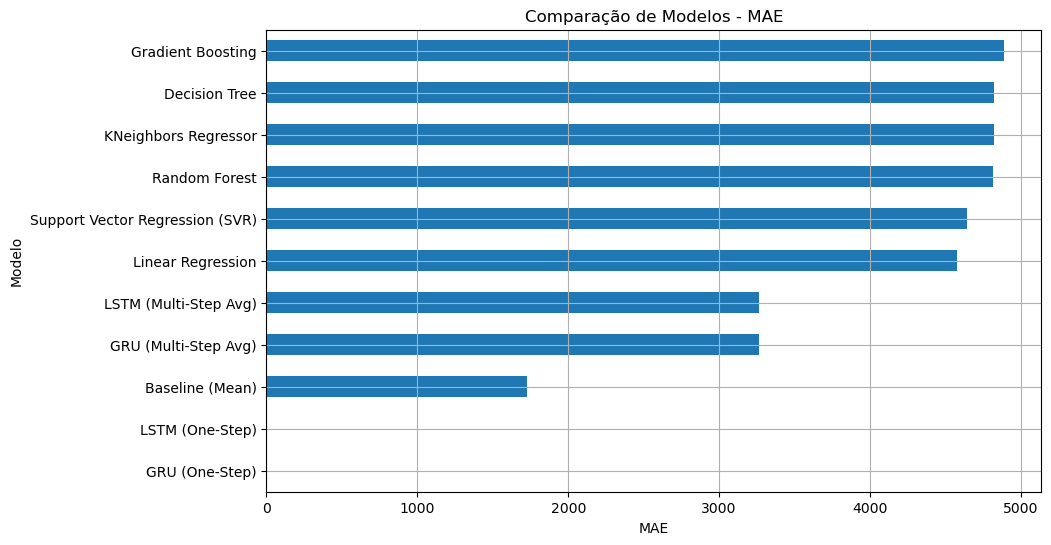

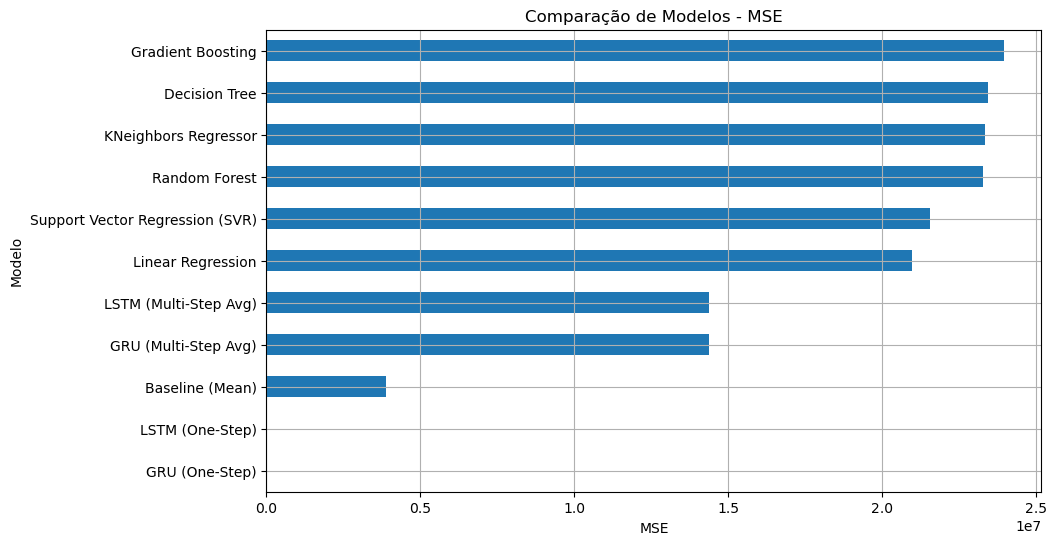

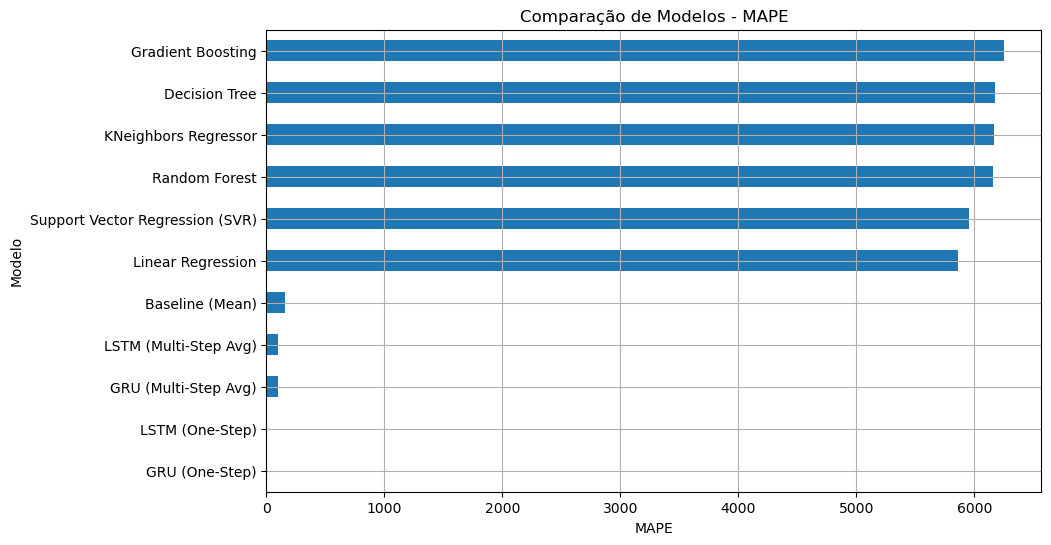

In [129]:
results_comparison = []

for name, model in regressors.items():
    # Achatar X_test para 2D
    X_test_2d = X_test.reshape(X_test.shape[0], -1)

    # Garantir que y_test seja 1D
    y_test_flat = y_test.reshape(-1)
    
    # Fazer previsões
    y_pred = model.predict(X_test_2d)
    
    # Calcular métricas
    mae = mean_absolute_error(y_test_flat, y_pred)
    mse = mean_squared_error(y_test_flat, y_pred)
    mape = mean_absolute_percentage_error(y_test_flat, y_pred)
    
    results_comparison.append({'Model': name, 'MAE': mae, 'MSE': mse, 'MAPE': mape})



# Adicionar resultados de GRU e LSTM (One-Step)
gru_mae, gru_mse, gru_mape = evaluate_one_step(y_test_one_step, y_pred_gru_one_step)
lstm_mae, lstm_mse, lstm_mape = evaluate_one_step(y_test_one_step, y_pred_lstm_one_step)

results_comparison.append({'Model': 'GRU (One-Step)', 'MAE': gru_mae, 'MSE': gru_mse, 'MAPE': gru_mape})
results_comparison.append({'Model': 'LSTM (One-Step)', 'MAE': lstm_mae, 'MSE': lstm_mse, 'MAPE': lstm_mape})

# Adicionar resultados Multi-Step para GRU e LSTM
results_comparison.append({'Model': 'GRU (Multi-Step Avg)', 'MAE': gru_mae_avg, 'MSE': gru_mse_avg, 'MAPE': gru_mape_avg})
results_comparison.append({'Model': 'LSTM (Multi-Step Avg)', 'MAE': lstm_mae_avg, 'MSE': lstm_mse_avg, 'MAPE': lstm_mape_avg})

# Adicionar resultados do modelo baseline
results_comparison.append({'Model': 'Baseline (Mean)', 'MAE': baseline_metrics['MAE'], 
                           'MSE': baseline_metrics['MSE'], 'MAPE': baseline_metrics['MAPE']})

results_df = pd.DataFrame(results_comparison)
print("Comparação de Resultados:")
print(results_df)

for metric in ['MAE', 'MSE', 'MAPE']:
    plt.figure(figsize=(10, 6))
    results_df.set_index('Model')[metric].sort_values().plot(kind='barh')
    plt.title(f'Comparação de Modelos - {metric}')
    plt.xlabel(metric)
    plt.ylabel('Modelo')
    plt.grid()
    plt.show()



<div class="alert alert-block alert-info">
Avaliação para Previsão One-Step : 

Melhor Desempenho: GRU (One-Step)

MAE: 0.0176

MSE: 0.0011

MAPE: 2.22%

Segundo Melhor: LSTM (One-Step)

MAE: 0.0361

MSE: 0.0029

MAPE: 4.62%

Avaliação para Previsão Multi-Step

Melhores Desempenhos: GRU (Multi-Step Avg) e LSTM (Multi-Step Avg)

Ambos os modelos apresentam métricas quase idênticas:

MAE: ~3264

MSE: ~1.44 × 10⁷

MAPE: ~99.92%

Para previsões Multi-Step, tanto o GRU quanto o LSTM superam significativamente a baseline e os modelos tradicionais. No entanto, a diferença entre GRU e LSTM é desprezável: Melhor Modelo Multi-Step: GRU (Multi-Step Avg) ou LSTM (Multi-Step Avg)


Para Previsão One-Step: GRU (One-Step)

Para Previsão Multi-Step: GRU (Multi-Step Avg) ou LSTM (Multi-Step Avg)
</div>
